In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy import stats

In [3]:
df = pd.read_csv("C:/Users/LENOVO/Downloads/house-prices-advanced-regression-techniques/train.csv")

# Expolaratory Data Analysis

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

<Axes: >

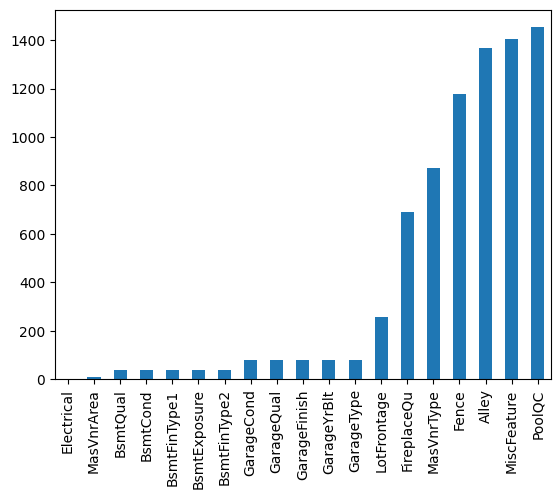

In [7]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [8]:
df.duplicated().sum()

0

In [9]:
#print(df['Electrical'].unique()) #Electrical system drop this null row
#print(df['MasVnrArea'].unique()) # drop it  or fill it with 0
#print(df['BsmtQual'].unique()) # fill it with no basement
#print(df['BsmtCond'].unique())
#print(df['BsmtFinType1'].unique())
#print(df['BsmtExposure'].unique())
#print(df['BsmtFinType2'].unique())

#print(df['GarageCond'].unique())
#print(df['GarageQual'].unique())
#print(df['GarageFinish'].unique())
#print(df['GarageYrBlt'].unique())
#print(df['GarageType'].unique())

#print(df['LotFrontage'].unique()) #Linear feet of street connected to property
# Assume the null values is no fontage and fill it with 0

#print(df['FireplaceQu'].unique()) # fill it with no fire place
#print(len(df[pd.isnull(df['FireplaceQu']) & (df['Fireplaces'] == 0)]), missing[-6])
#print(df['MasVnrType'].unique()) # fill it with no Masonry veneer

#print(df['Fence'].unique()) # Fill it with no Fence
#print(df['Alley'].unique()) # Fill it with no Alley
#print(df['MiscFeature'].unique()) # No other categories
#print(df['PoolQC'].unique()) #Fill it with no Pool


# Data Cleaning

- Null Values (DONE)
- Duplicates (DONE)
- Outliers 
- Scaling

In [10]:
df = df.drop('Id', axis = 1)

## Missing values

In [11]:
missing

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [457]:
df = df.drop('LotFrontage', axis = 1) # drop it as it has 259 nulls and if I fill it with 0 it can be outliers
df['FireplaceQu'].fillna('No Fireplace', inplace = True)
df['MasVnrType'].fillna('No Masonry veneer', inplace = True)
df['Fence'].fillna('No Fence', inplace = True)
df['Alley'].fillna('No Alley', inplace = True)
df['MiscFeature'].fillna('No Other Categories', inplace = True)
df['PoolQC'].fillna('No Pool', inplace = True)
df = df.dropna() #the other will not affect on the data that much

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1338 non-null   int64  
 1   YearBuilt      1338 non-null   int64  
 2   YearRemodAdd   1338 non-null   int64  
 3   MasVnrArea     1338 non-null   float64
 4   BsmtFinSF1     1338 non-null   int64  
 5   BsmtFinSF2     1338 non-null   int64  
 6   BsmtUnfSF      1338 non-null   int64  
 7   TotalBsmtSF    1338 non-null   int64  
 8   1stFlrSF       1338 non-null   int64  
 9   2ndFlrSF       1338 non-null   int64  
 10  LowQualFinSF   1338 non-null   int64  
 11  GrLivArea      1338 non-null   int64  
 12  BsmtFullBath   1338 non-null   int64  
 13  BsmtHalfBath   1338 non-null   int64  
 14  FullBath       1338 non-null   int64  
 15  HalfBath       1338 non-null   int64  
 16  BedroomAbvGr   1338 non-null   int64  
 17  KitchenAbvGr   1338 non-null   int64  
 18  TotRmsAbvGrd 

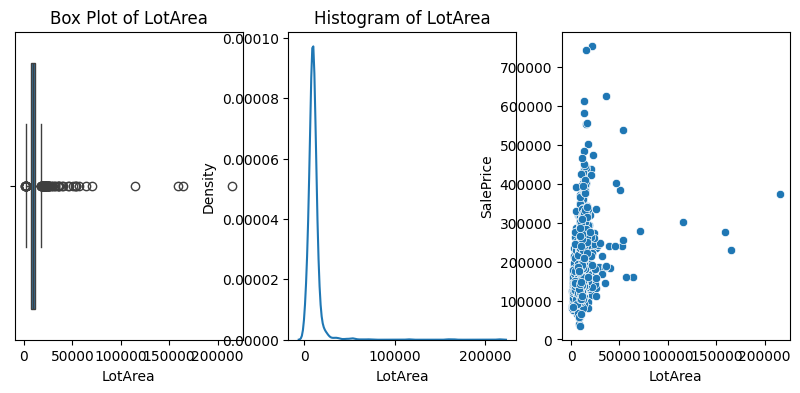

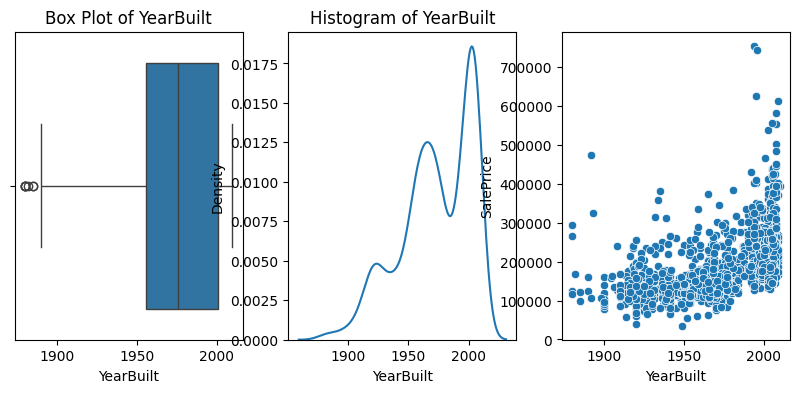

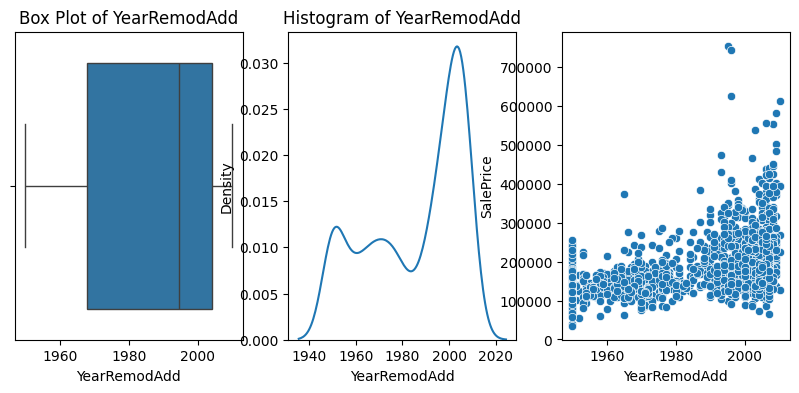

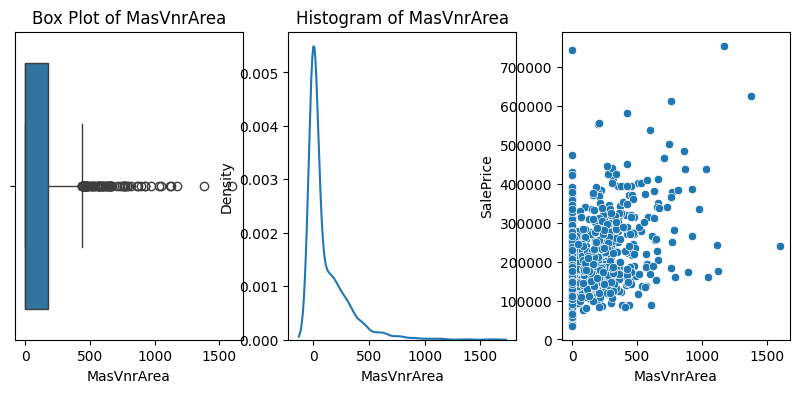

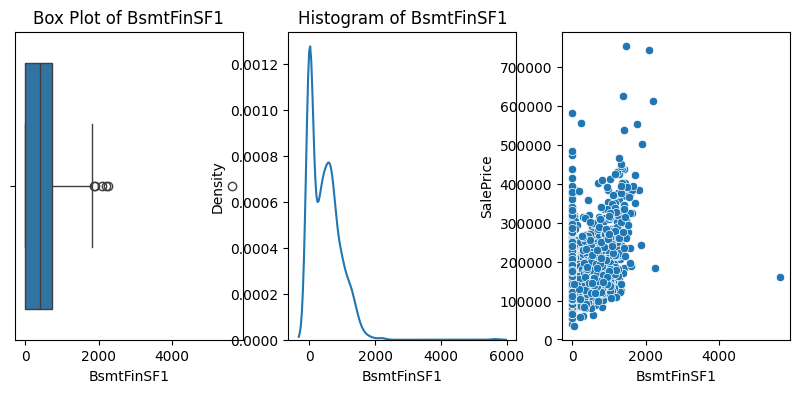

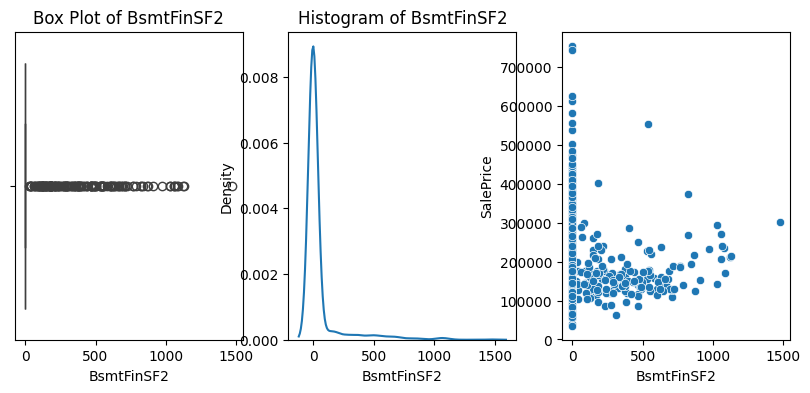

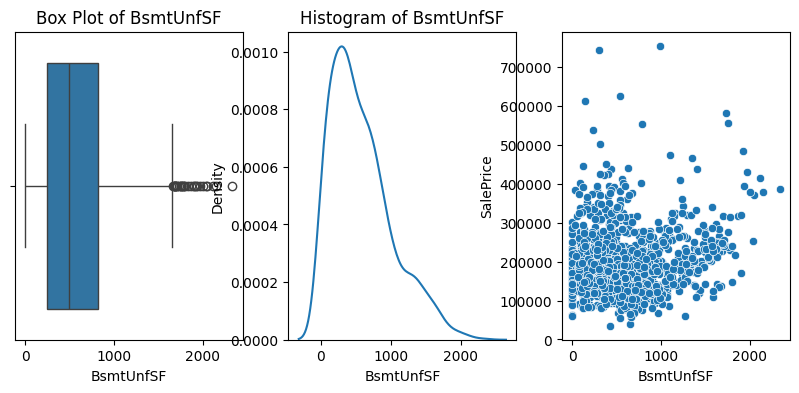

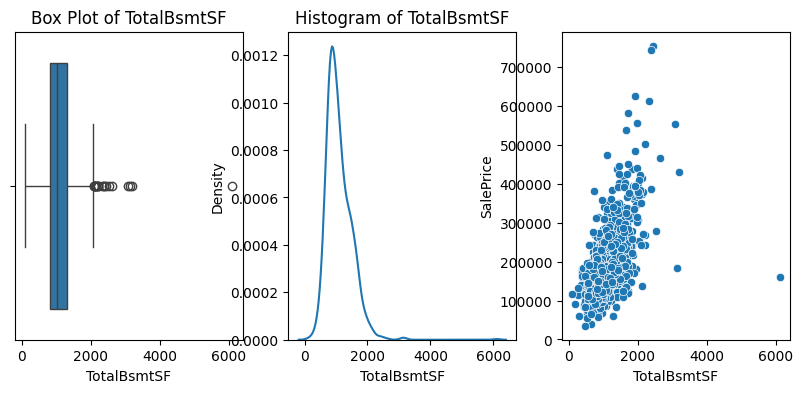

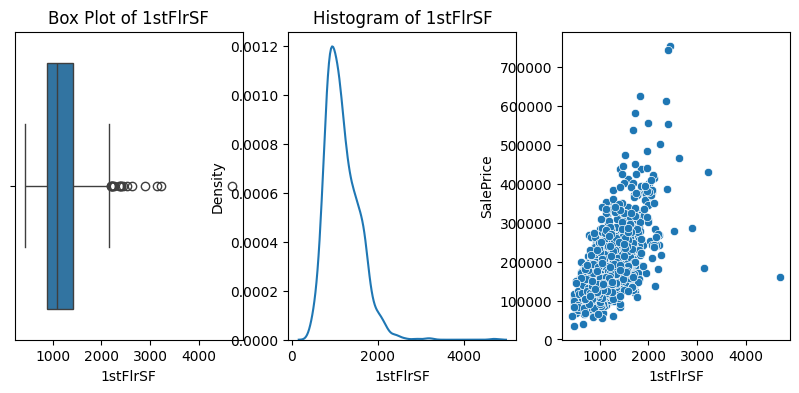

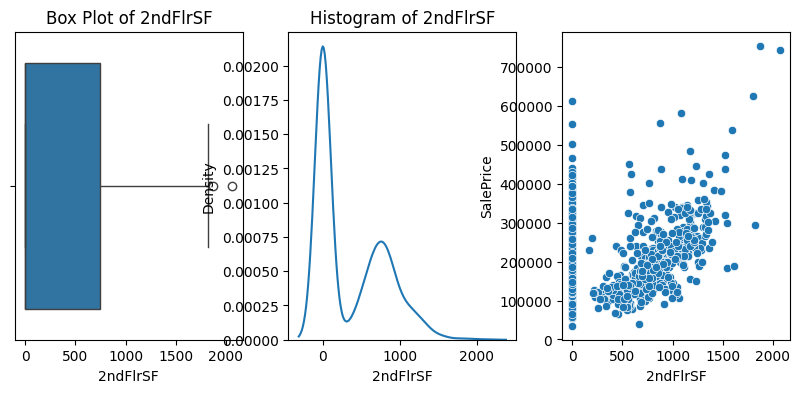

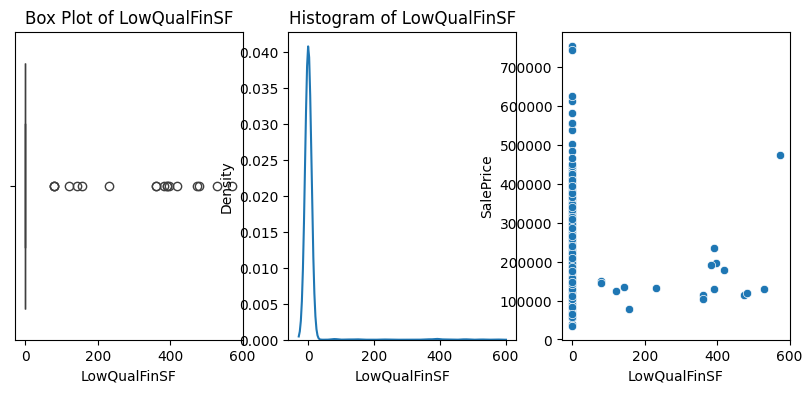

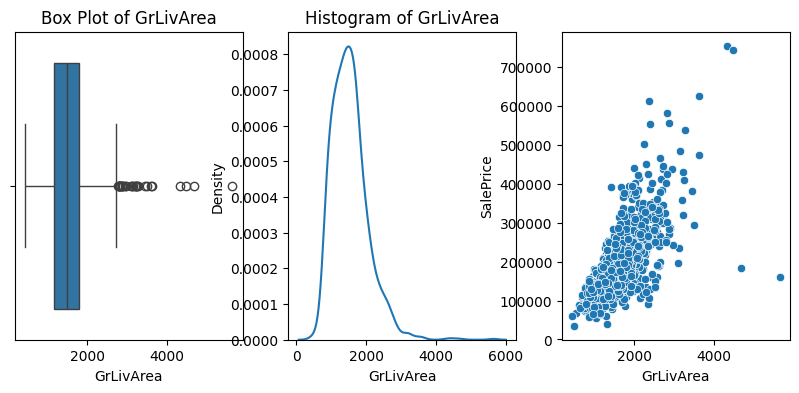

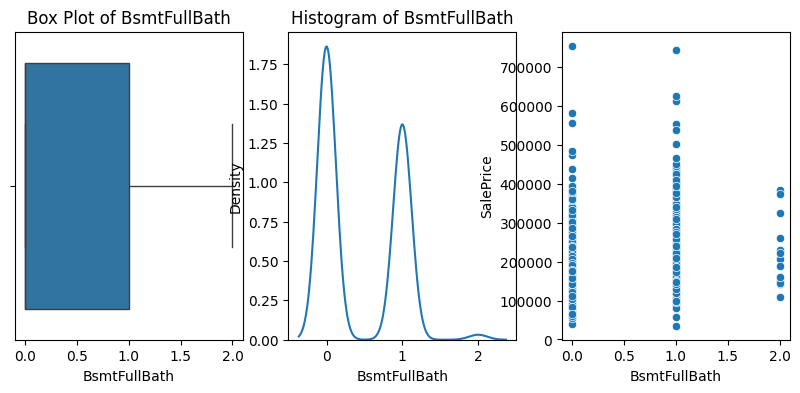

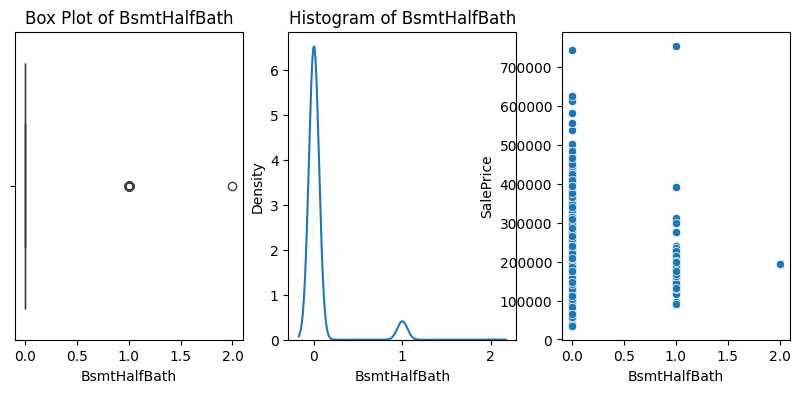

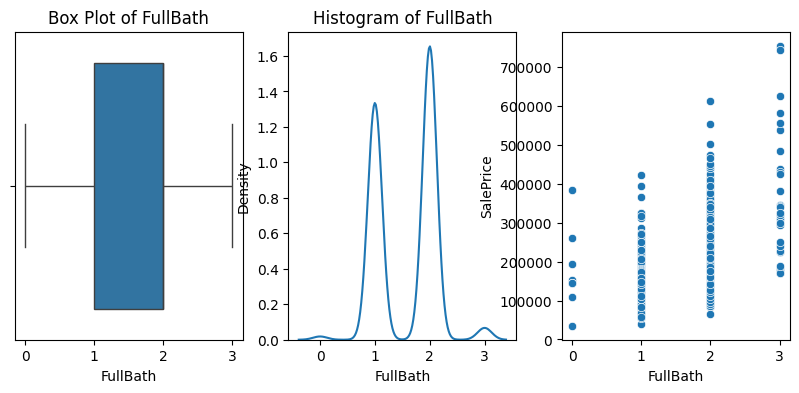

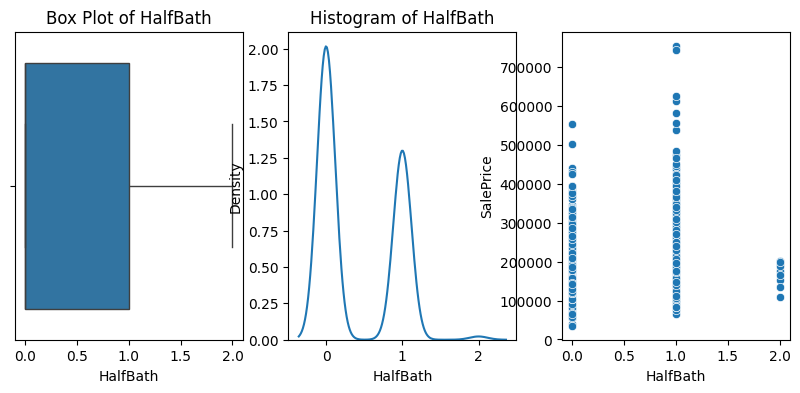

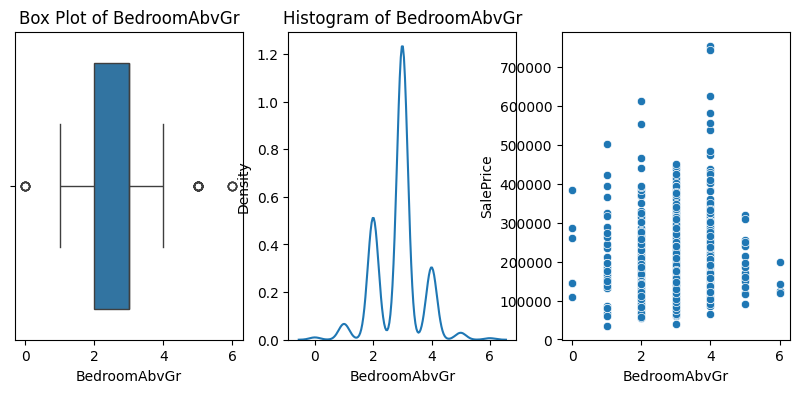

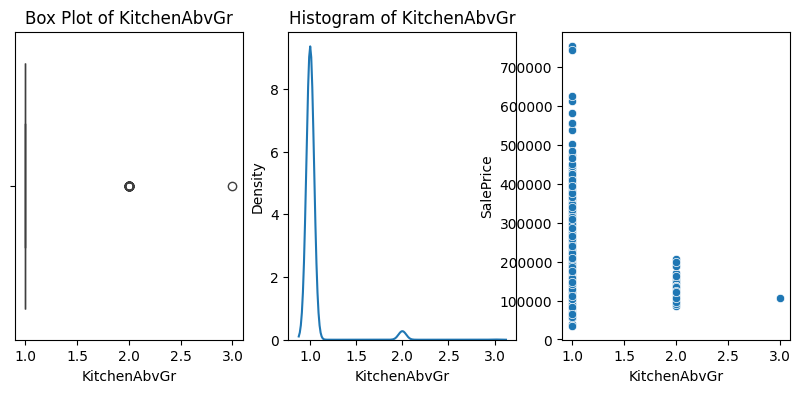

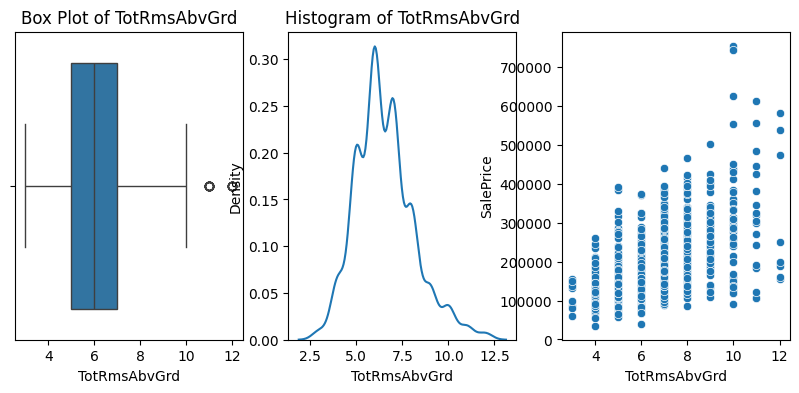

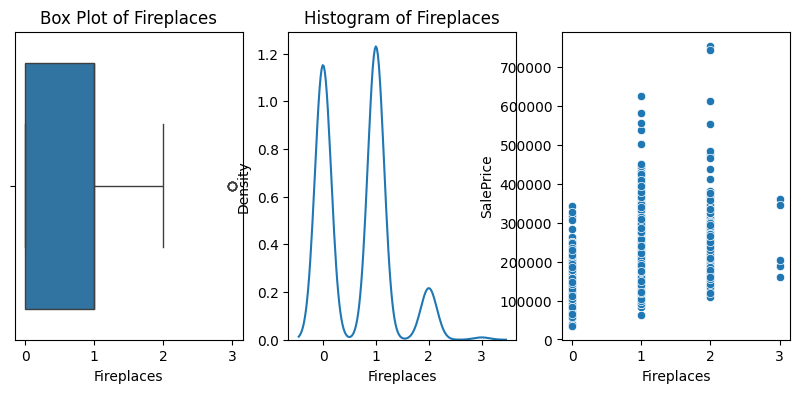

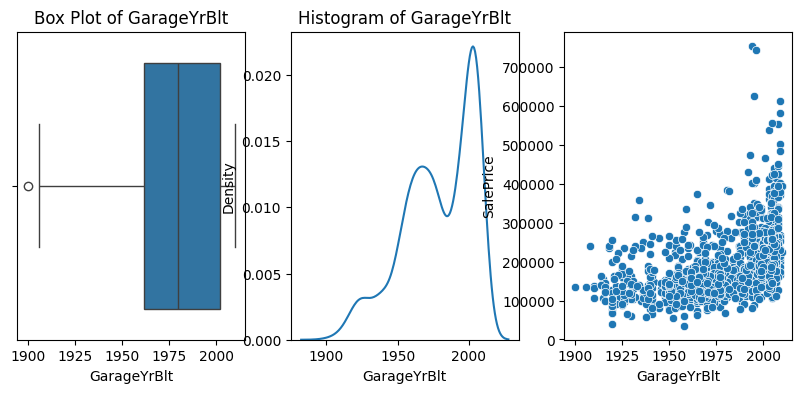

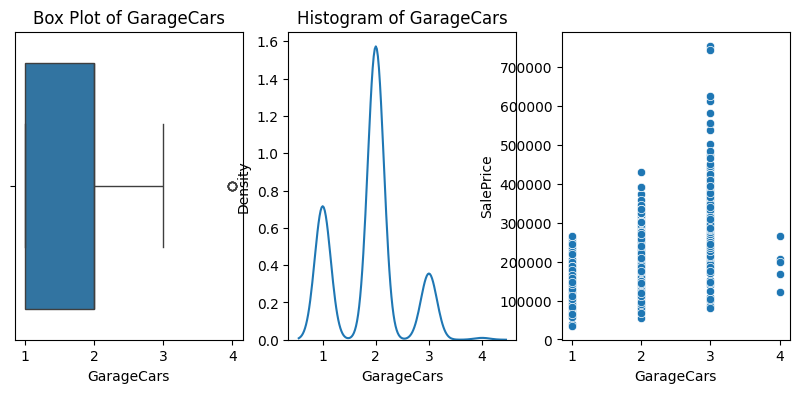

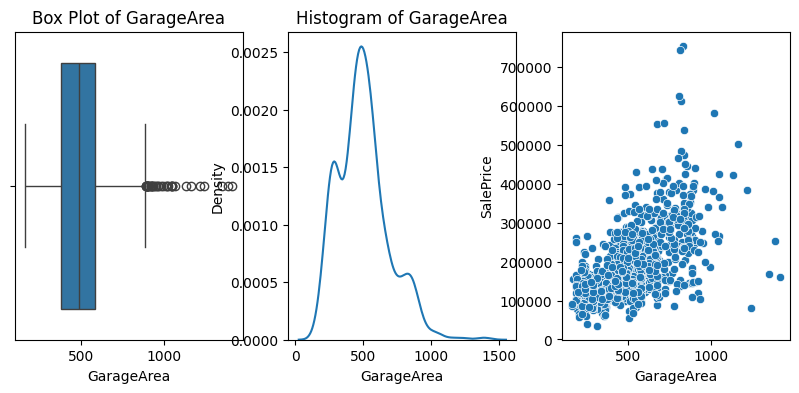

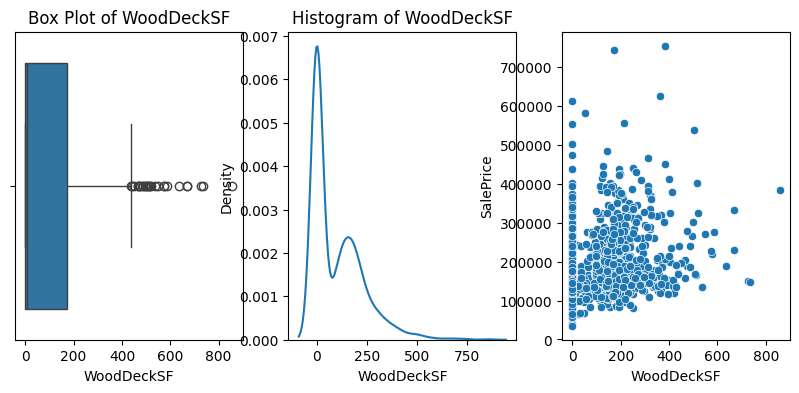

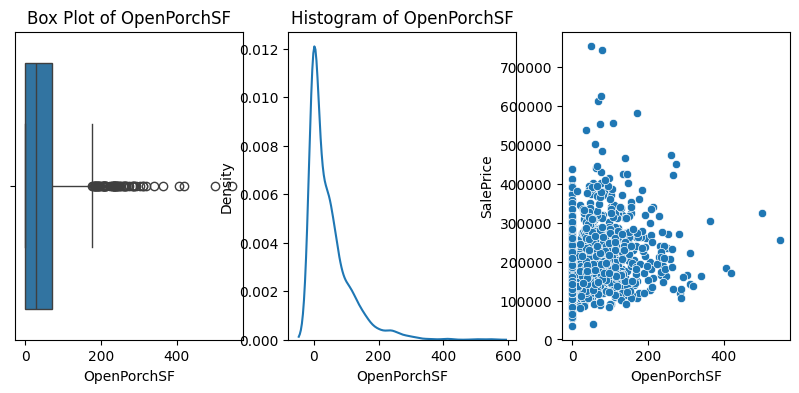

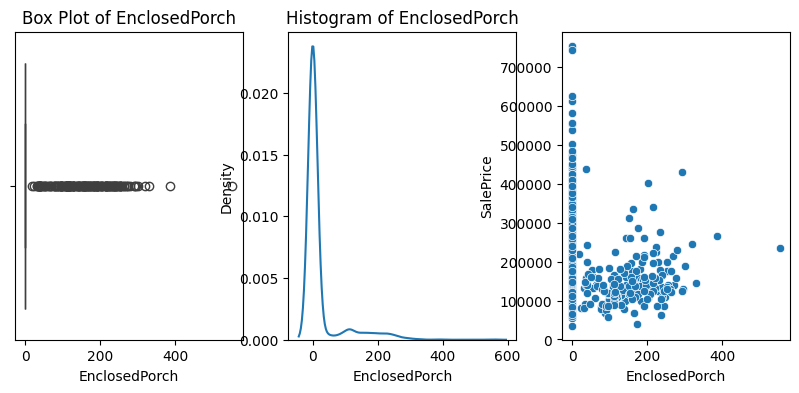

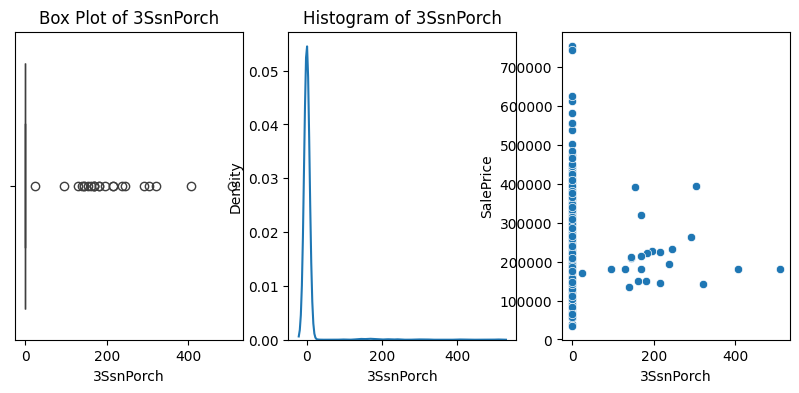

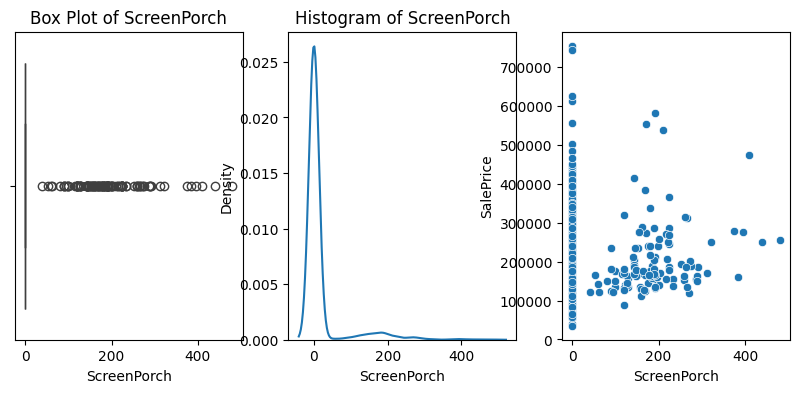

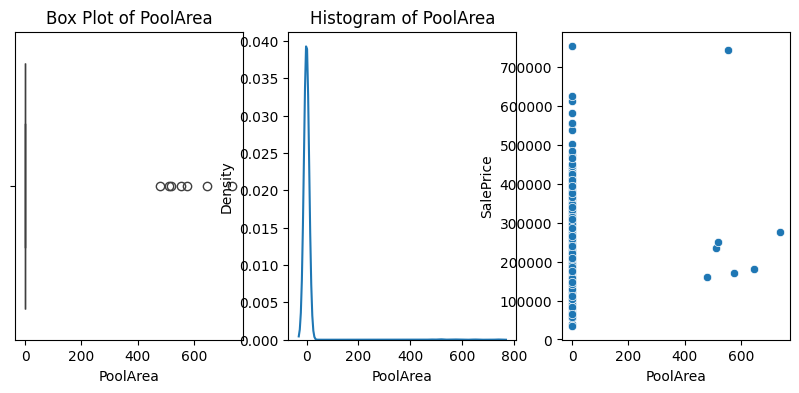

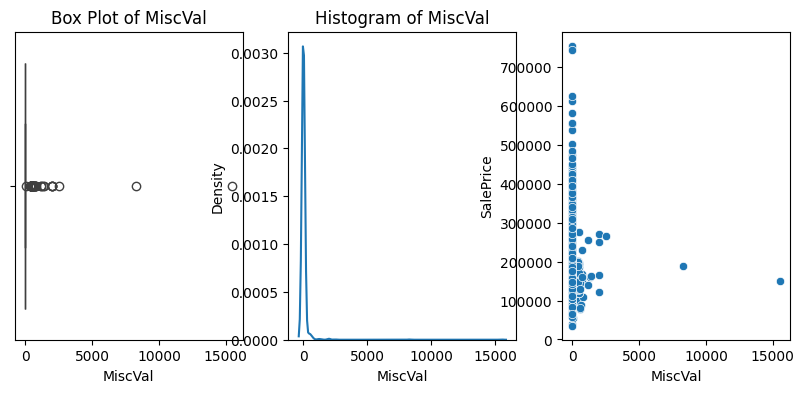

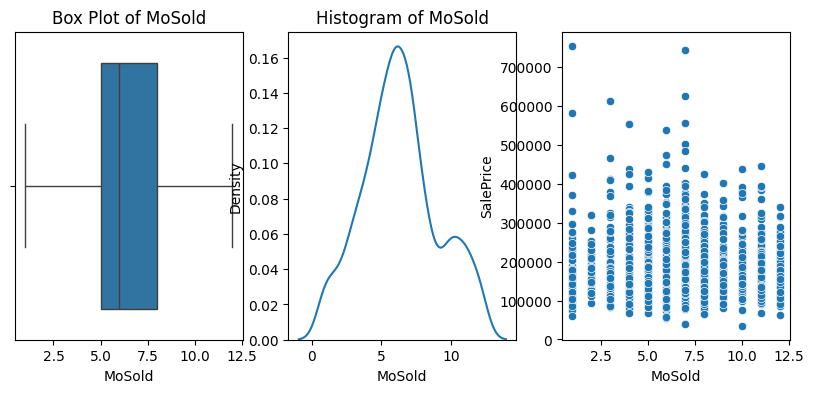

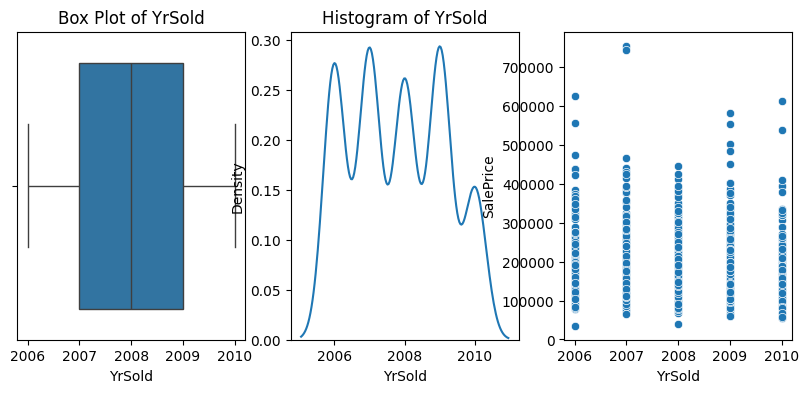

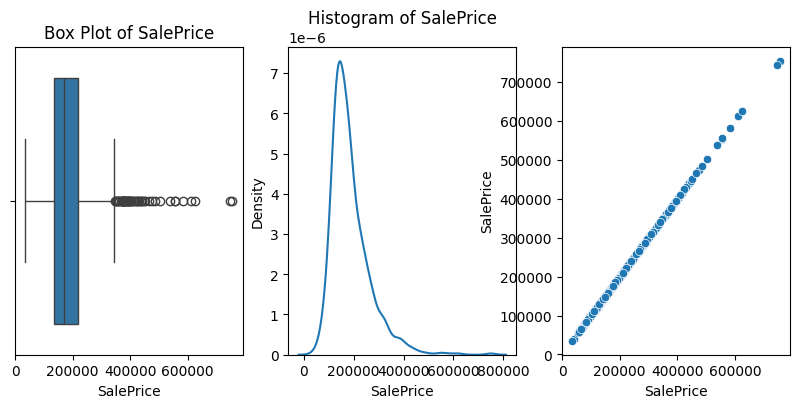

In [458]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(['MSSubClass','OverallQual','OverallCond'],axis=1)
df_numerical_columns.info()
for column in df_numerical_columns:
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    # Create a box plot in the left subplot
    sns.boxplot(x=df[column], ax=axes[0])

    # Create a histogram in the right subplot
    #axes[1].hist(df[column], bins=20)
    sns.kdeplot(x=df[column], ax=axes[1])
    sns.scatterplot(x=df[column], y=df['SalePrice'],ax=axes[2])
    # Set titles for both subplots
    axes[0].set_title(f'Box Plot of {column}')
    axes[1].set_title(f'Histogram of {column}')
    plt.show()c

After ploting and see the outliers we can drop (Fence, Alley, MiscFeature,PoolQC, LotFrontage) and drop the raws od the rest

In [459]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(['MSSubClass','OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold', 'YrSold', 'SalePrice'],axis=1)

In [460]:
df_numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1338 non-null   int64  
 1   MasVnrArea     1338 non-null   float64
 2   BsmtFinSF1     1338 non-null   int64  
 3   BsmtFinSF2     1338 non-null   int64  
 4   BsmtUnfSF      1338 non-null   int64  
 5   TotalBsmtSF    1338 non-null   int64  
 6   1stFlrSF       1338 non-null   int64  
 7   2ndFlrSF       1338 non-null   int64  
 8   LowQualFinSF   1338 non-null   int64  
 9   GrLivArea      1338 non-null   int64  
 10  GarageArea     1338 non-null   int64  
 11  WoodDeckSF     1338 non-null   int64  
 12  OpenPorchSF    1338 non-null   int64  
 13  EnclosedPorch  1338 non-null   int64  
 14  3SsnPorch      1338 non-null   int64  
 15  ScreenPorch    1338 non-null   int64  
 16  PoolArea       1338 non-null   int64  
 17  MiscVal        1338 non-null   int64  
dtypes: float64(1)

In [461]:
df.LowQualFinSF.unique()

array([  0, 360, 528, 572, 144, 392, 390, 420, 473, 156,  80, 232, 481,
       120, 397, 384], dtype=int64)

# Applying Log and Box Cox to normalize 

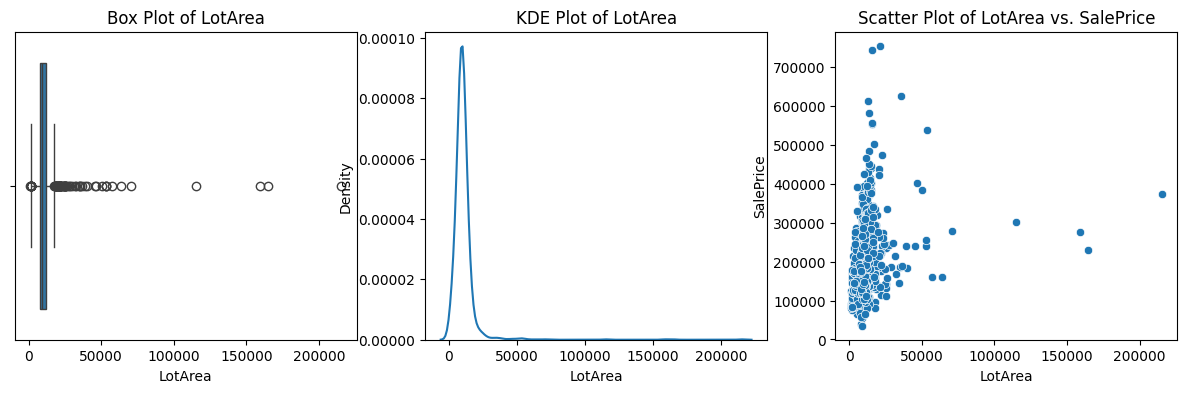

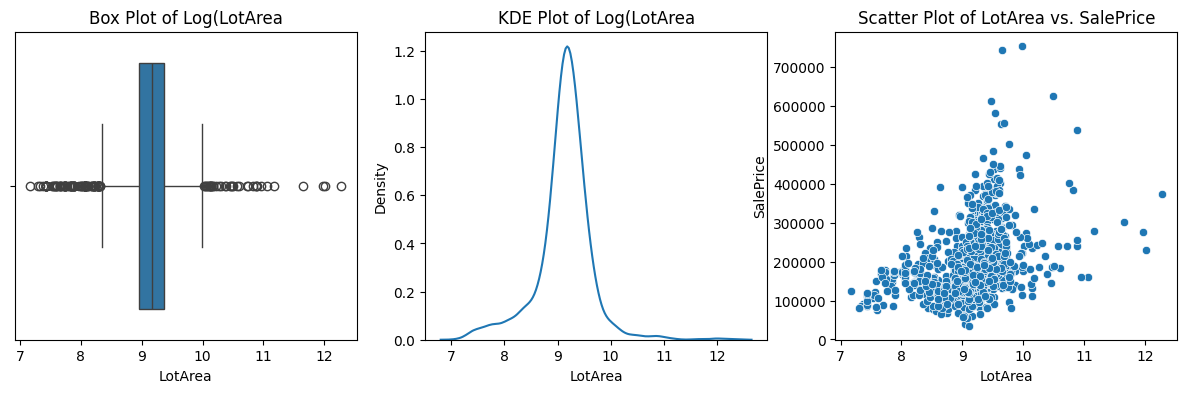

LotArea


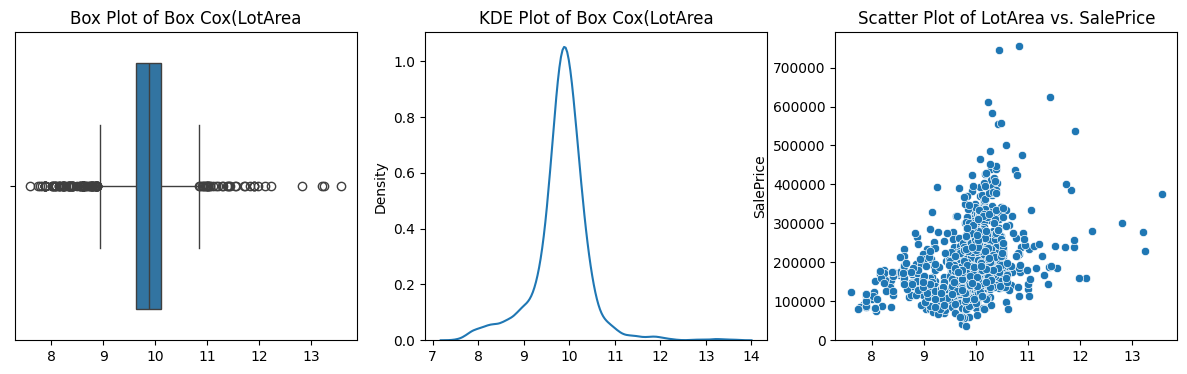

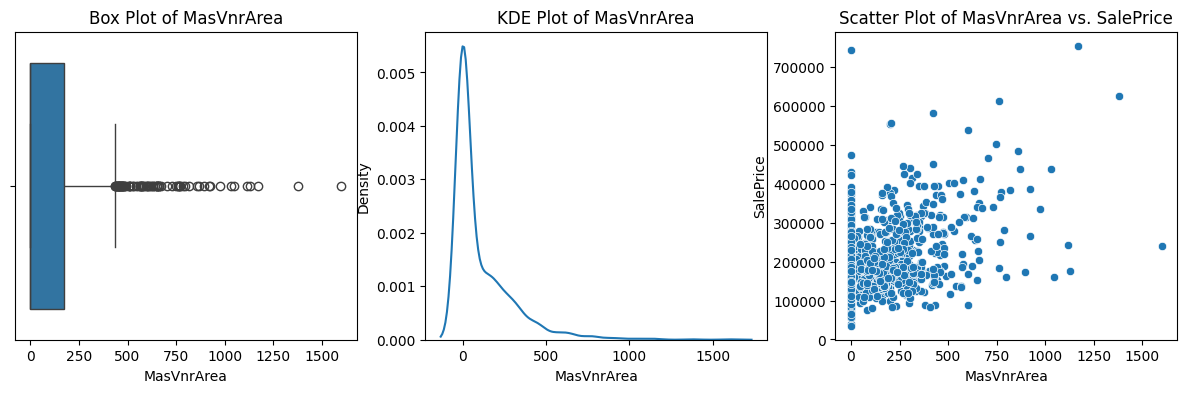

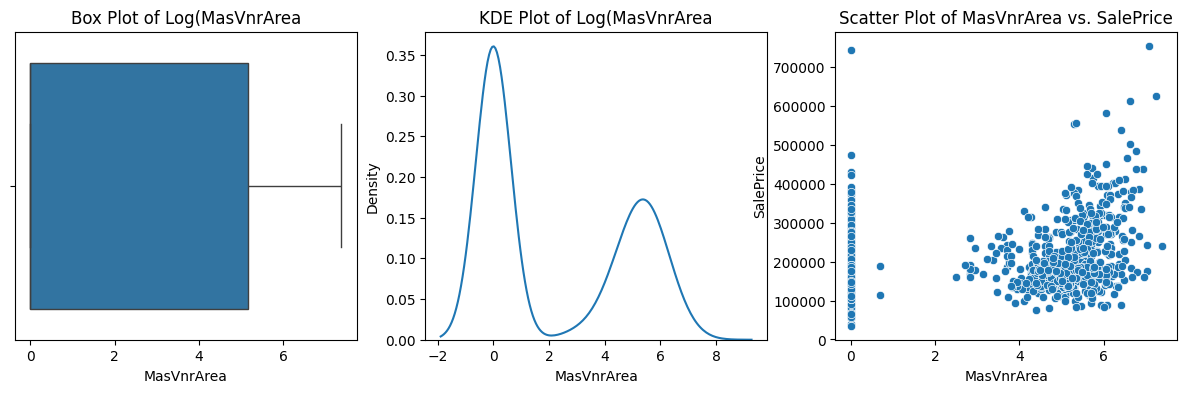

Box-Cox transformation not applicable for MasVnrArea due to non-positive data.


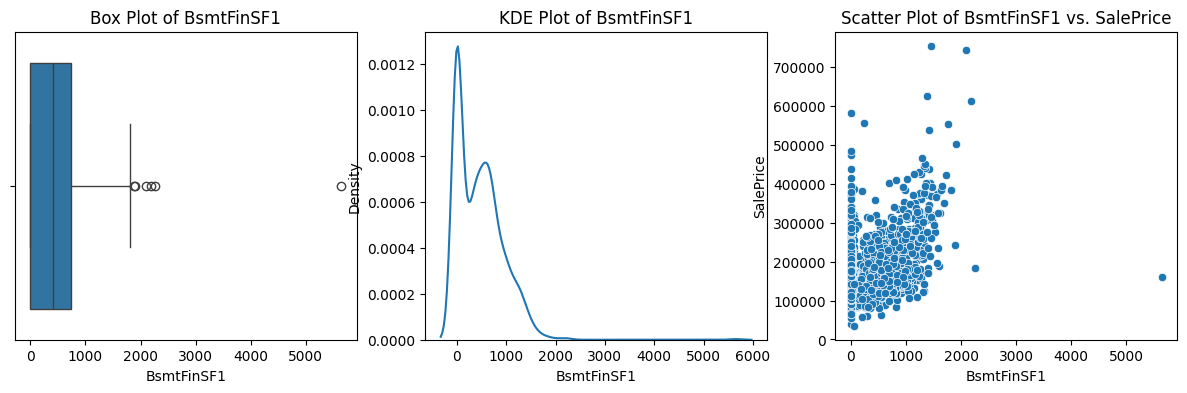

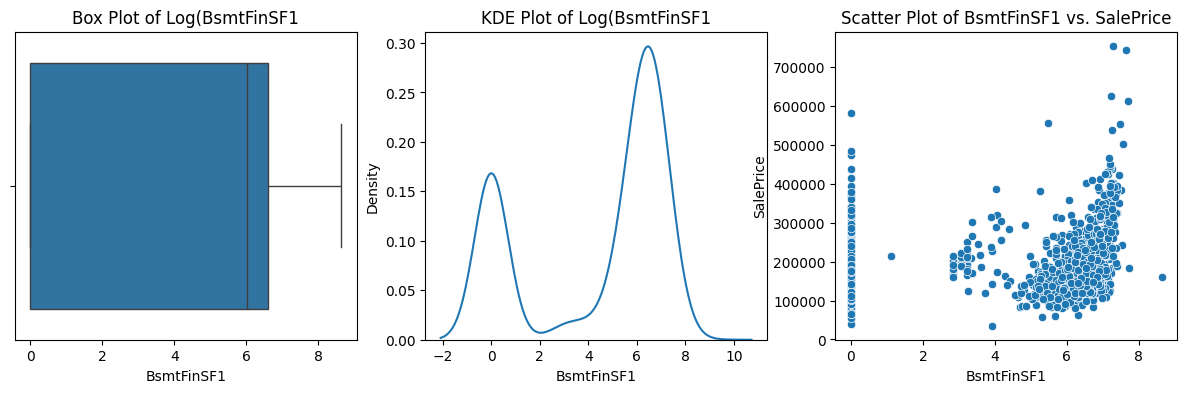

Box-Cox transformation not applicable for BsmtFinSF1 due to non-positive data.


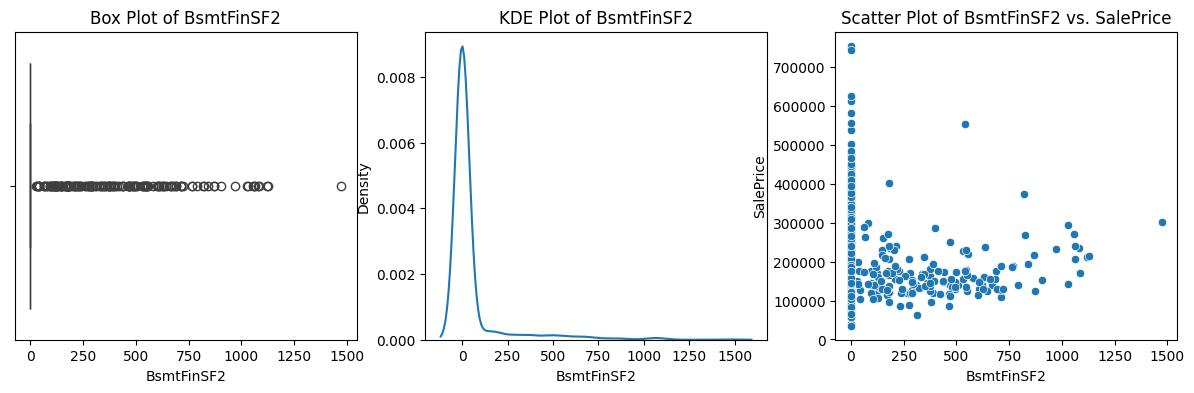

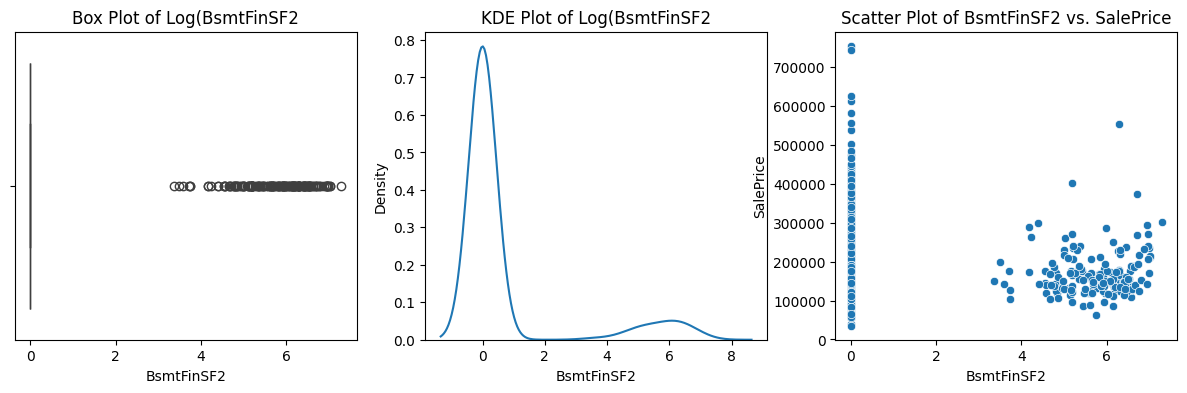

Box-Cox transformation not applicable for BsmtFinSF2 due to non-positive data.


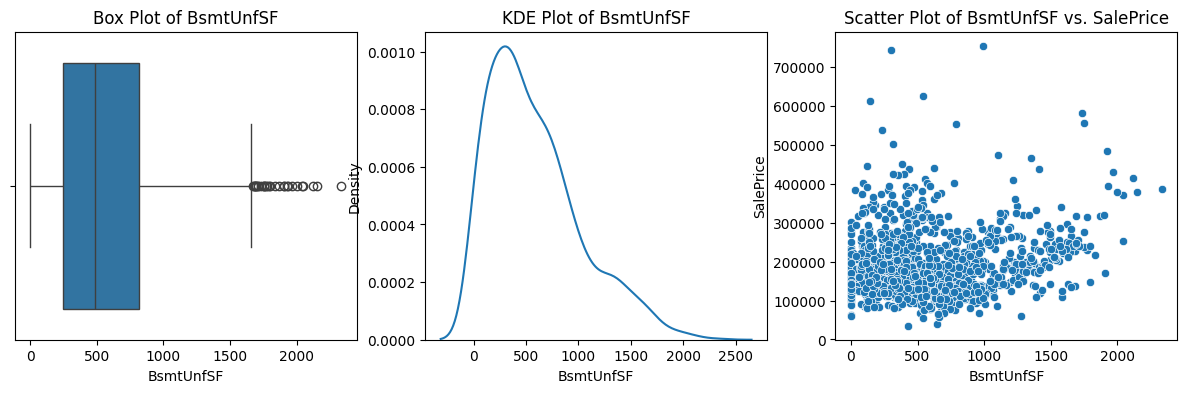

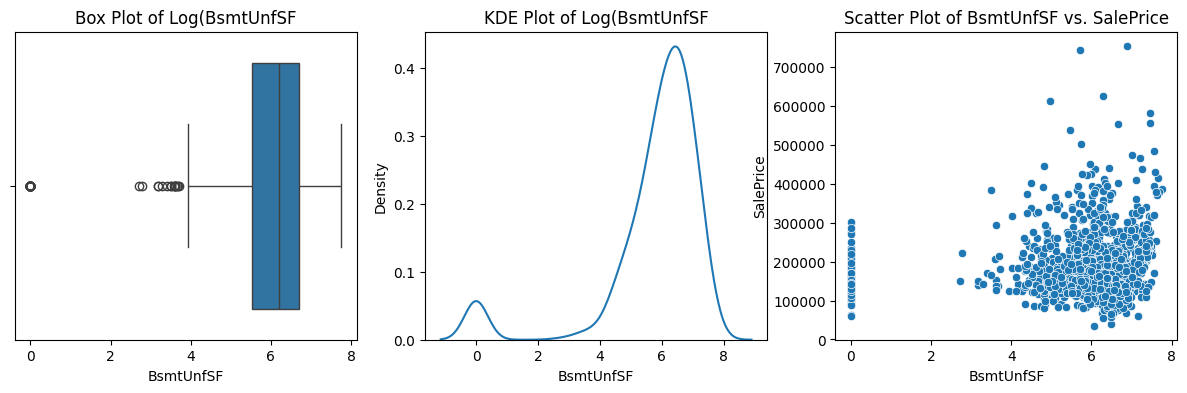

Box-Cox transformation not applicable for BsmtUnfSF due to non-positive data.


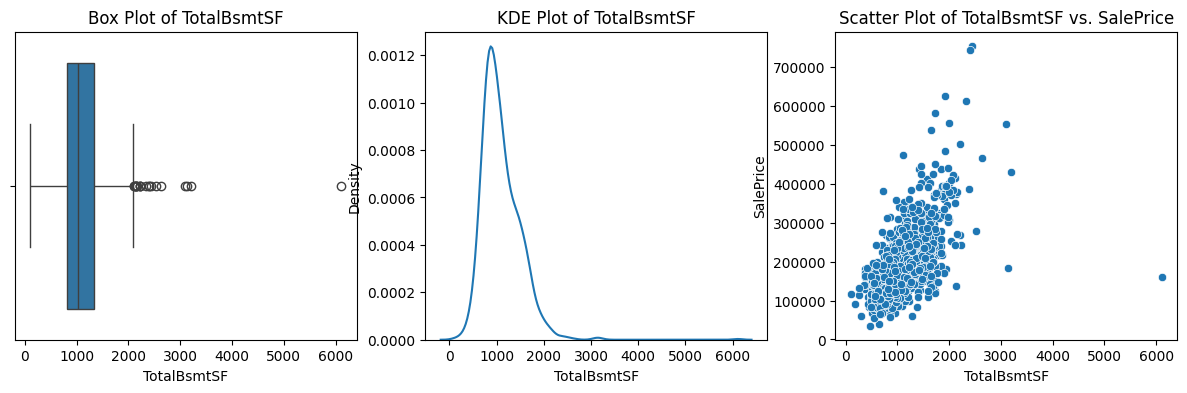

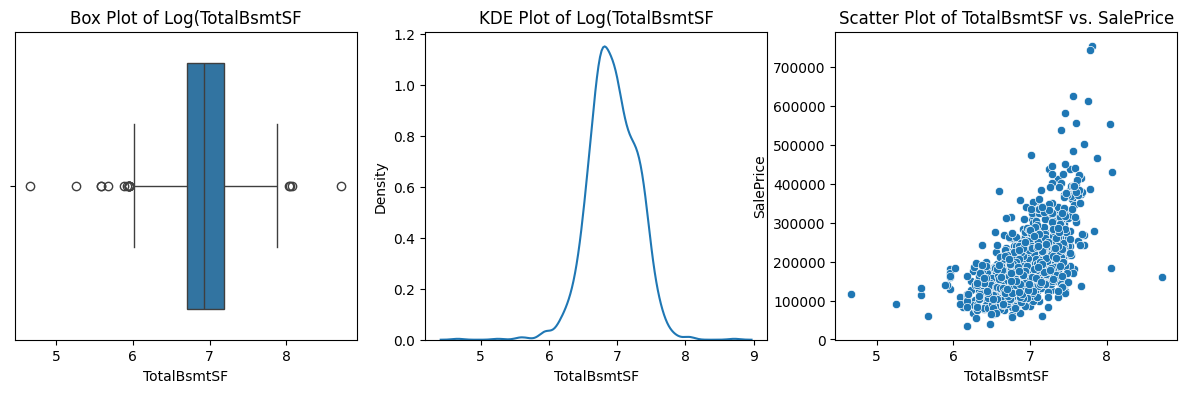

TotalBsmtSF


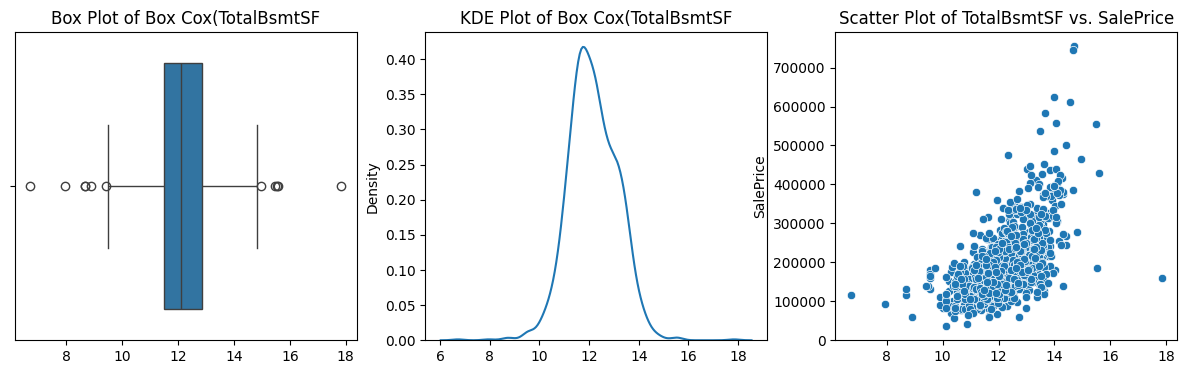

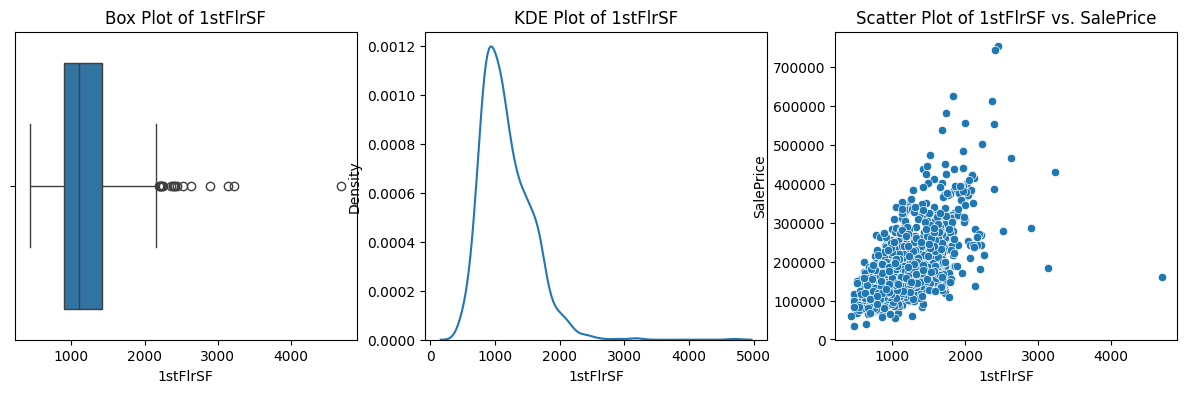

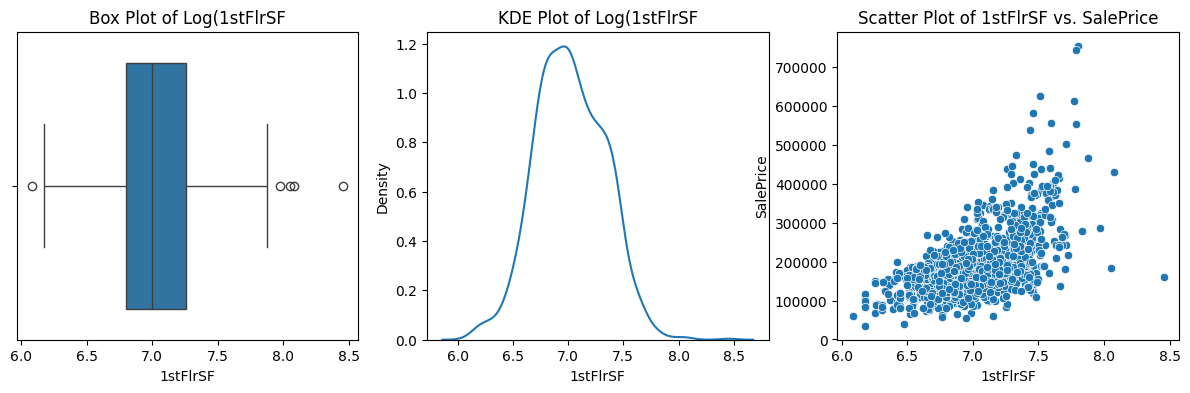

1stFlrSF


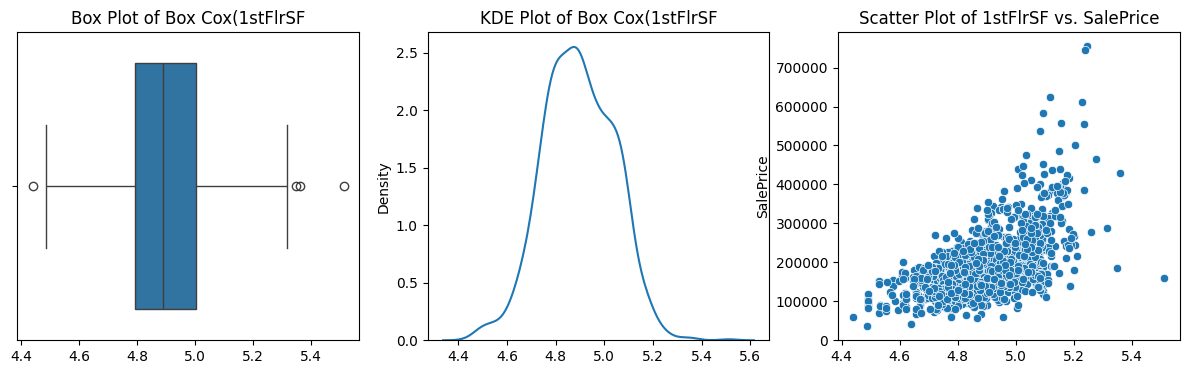

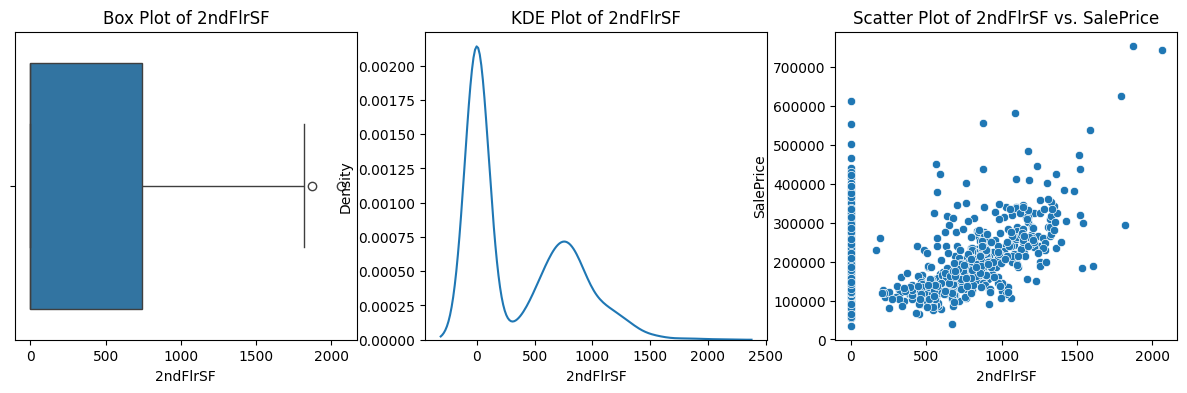

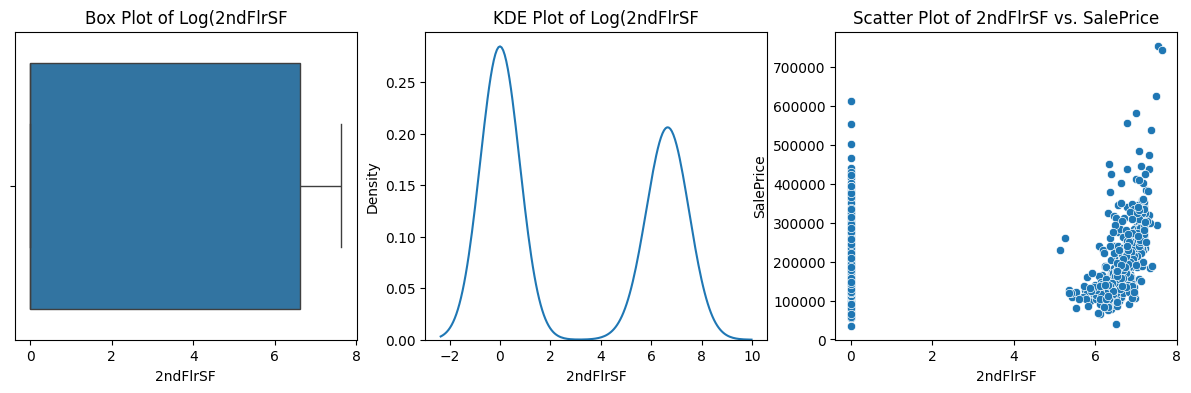

Box-Cox transformation not applicable for 2ndFlrSF due to non-positive data.


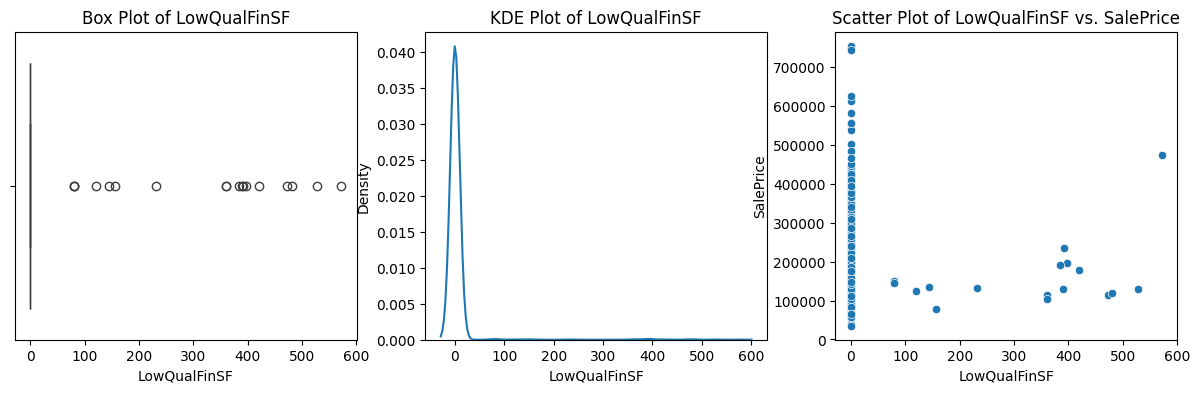

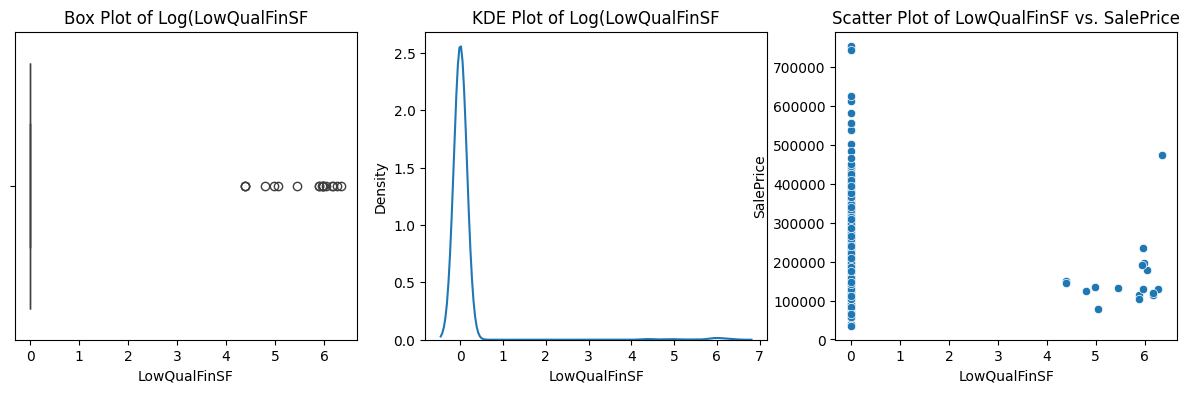

Box-Cox transformation not applicable for LowQualFinSF due to non-positive data.


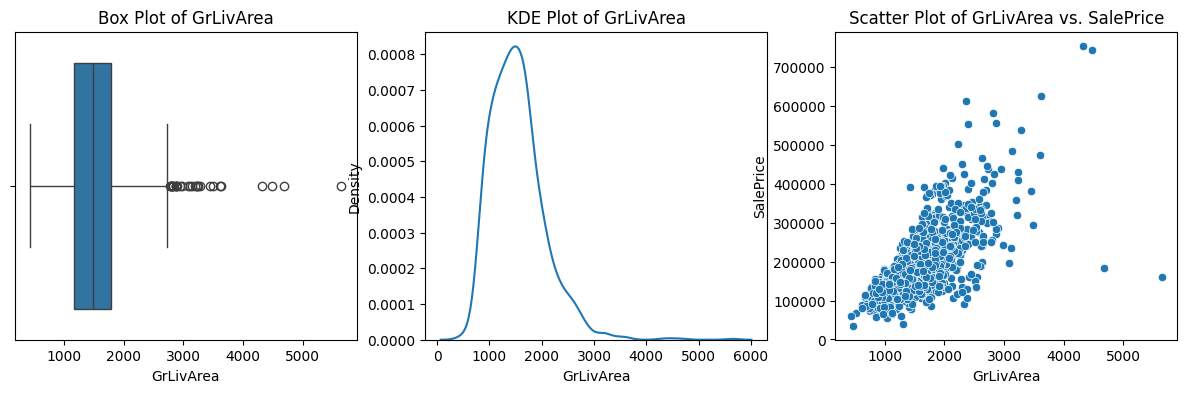

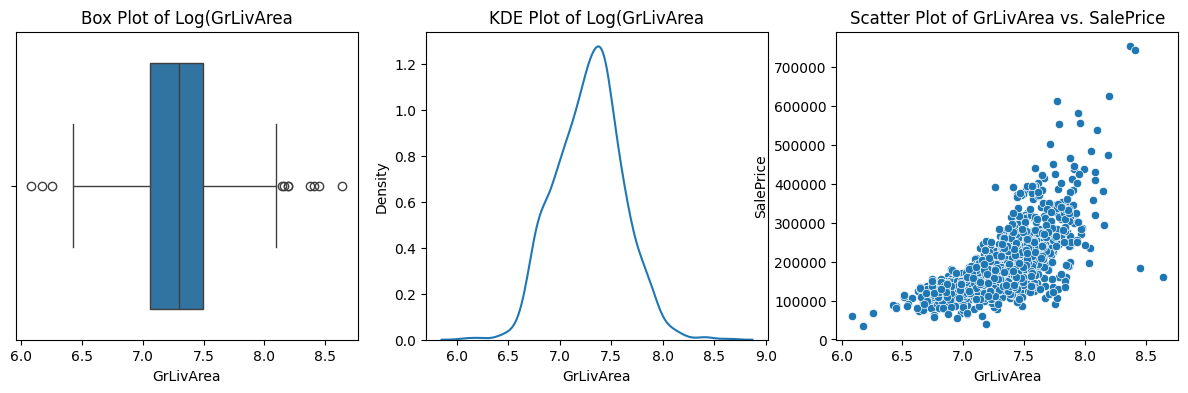

GrLivArea


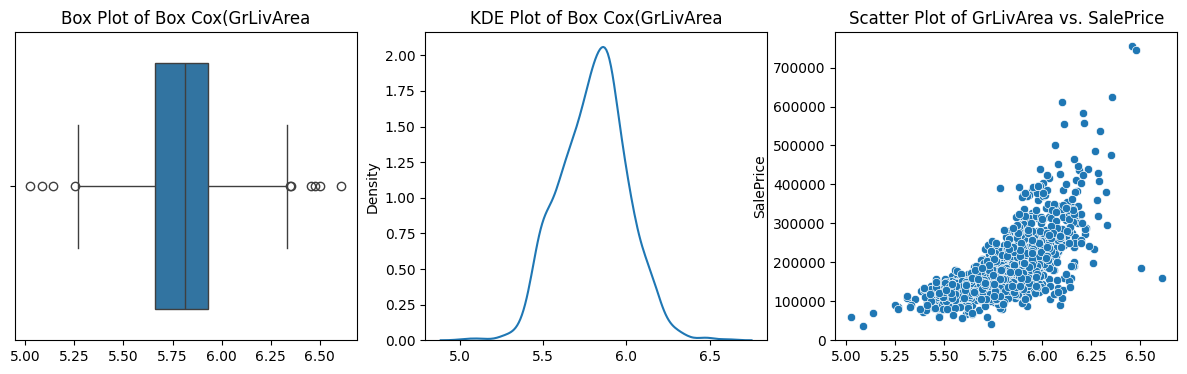

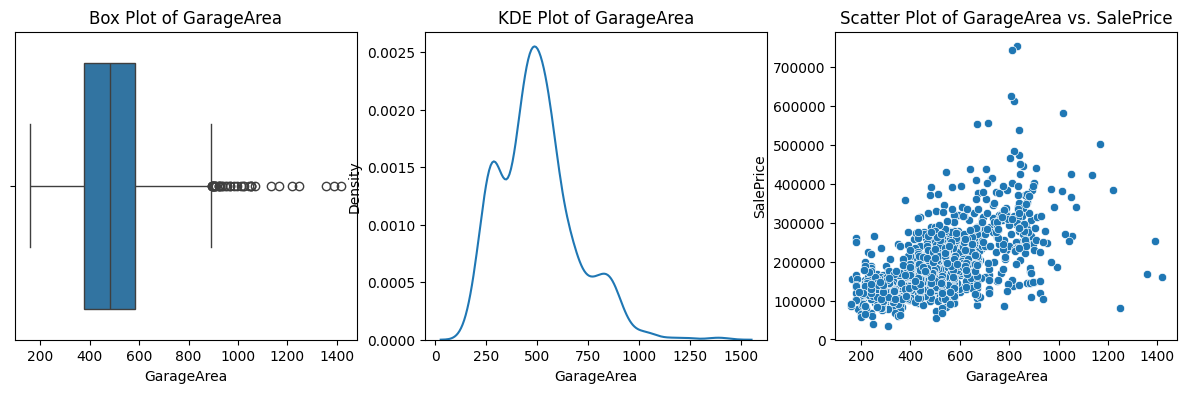

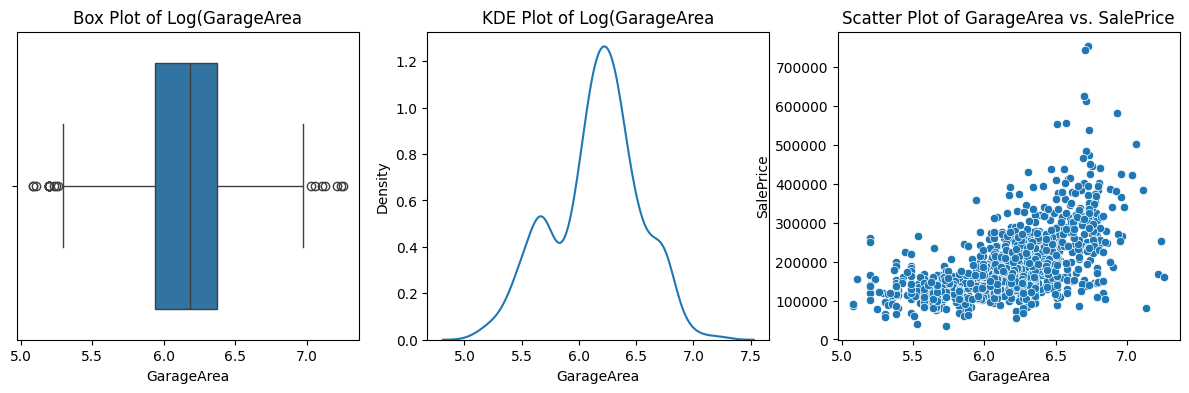

GarageArea


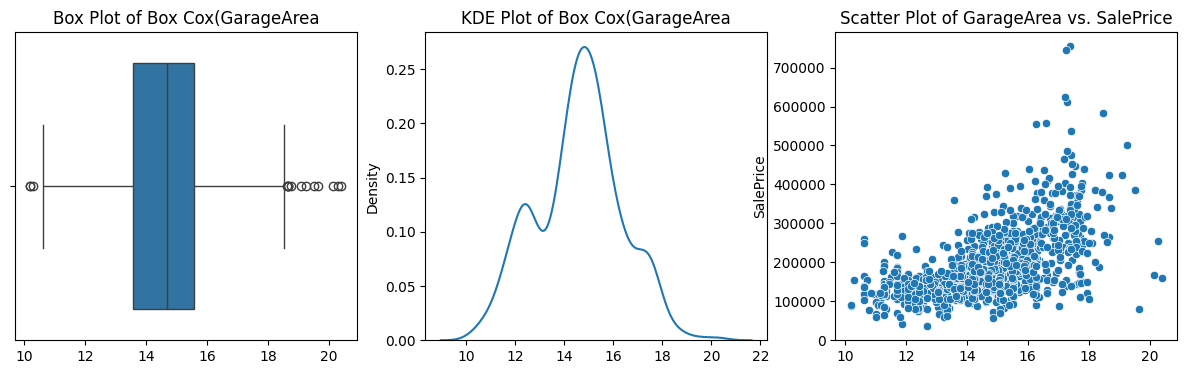

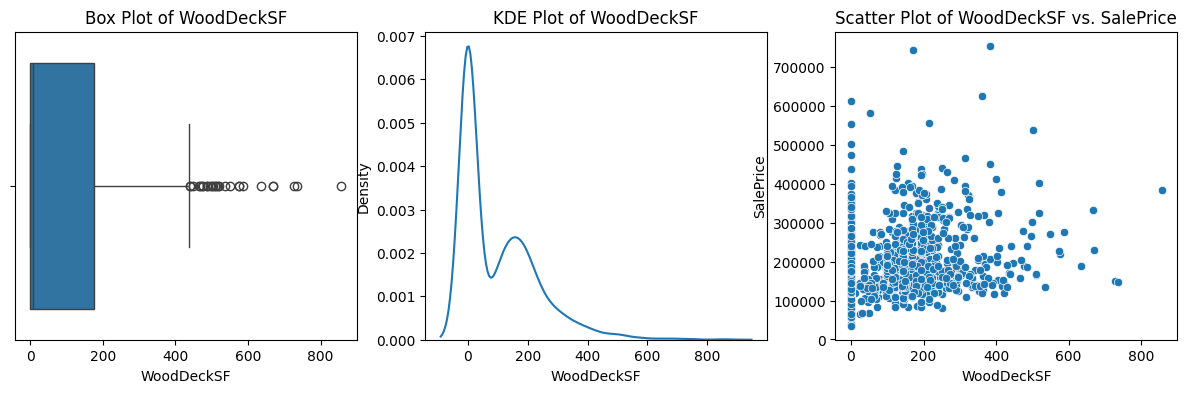

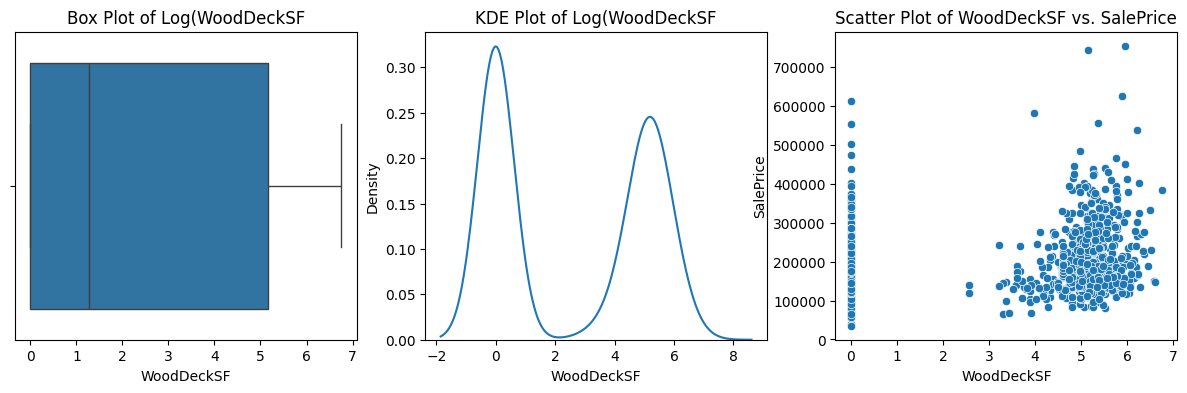

Box-Cox transformation not applicable for WoodDeckSF due to non-positive data.


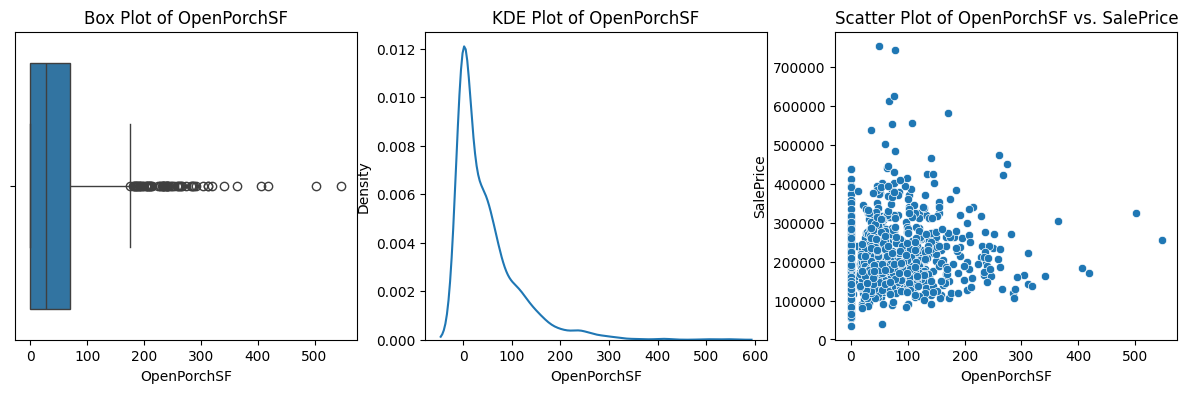

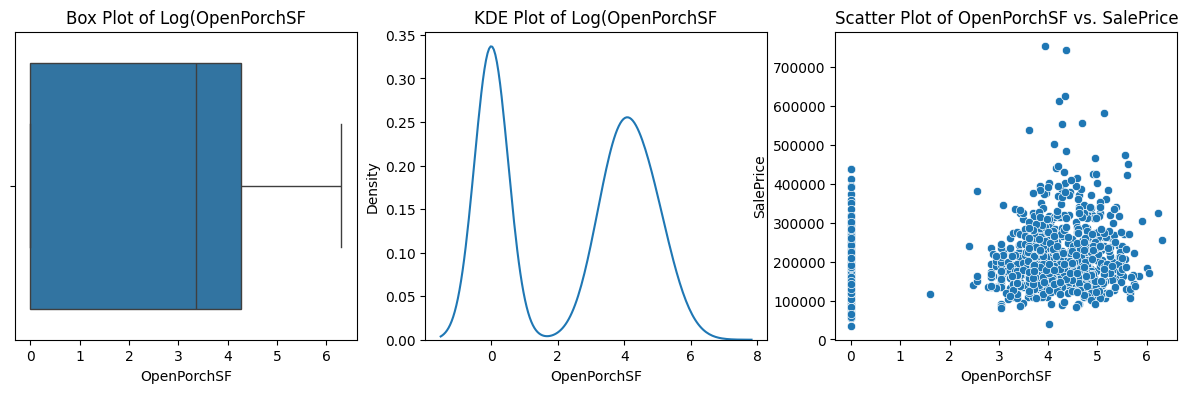

Box-Cox transformation not applicable for OpenPorchSF due to non-positive data.


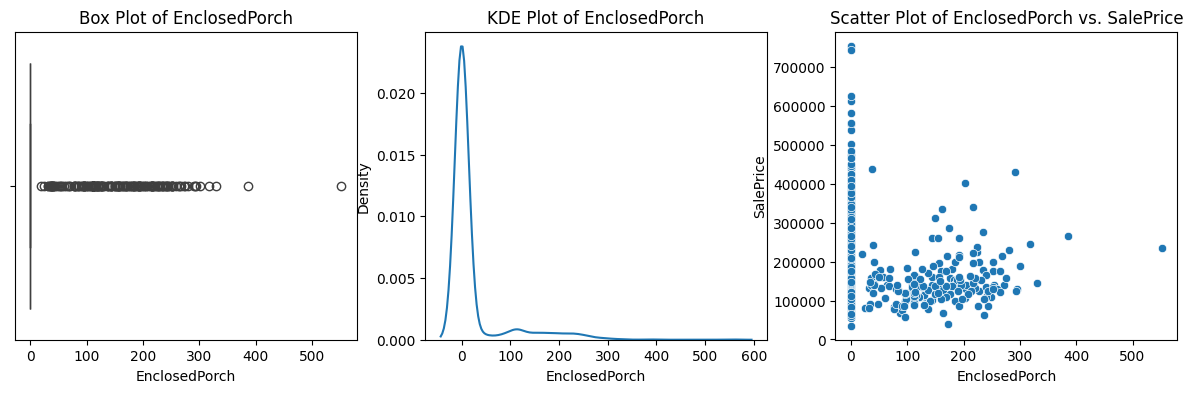

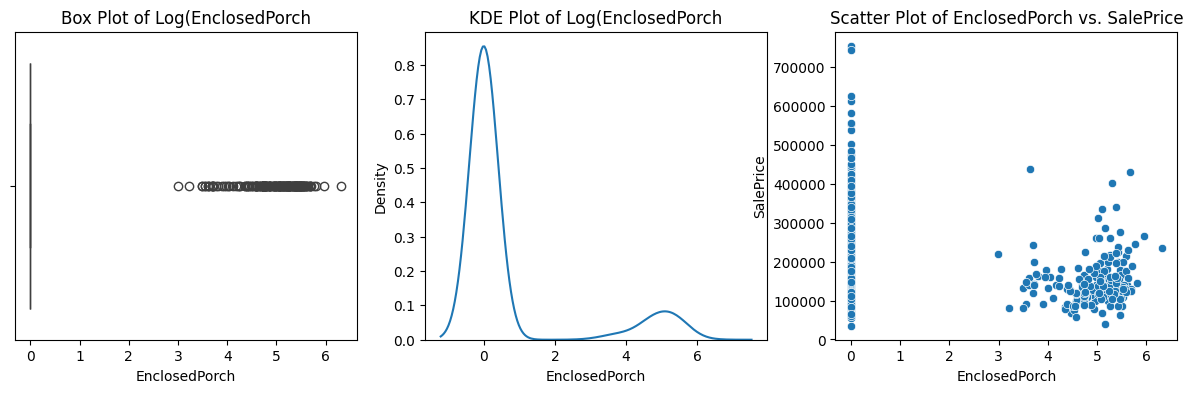

Box-Cox transformation not applicable for EnclosedPorch due to non-positive data.


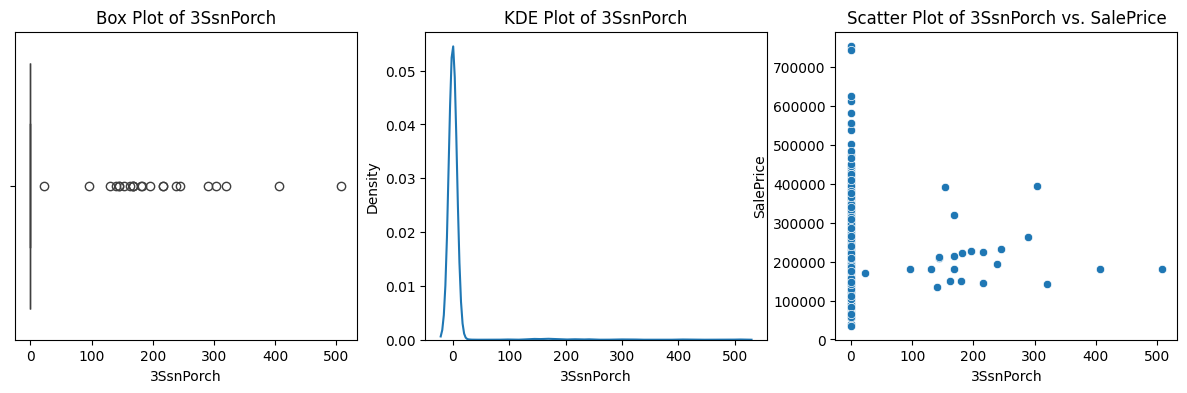

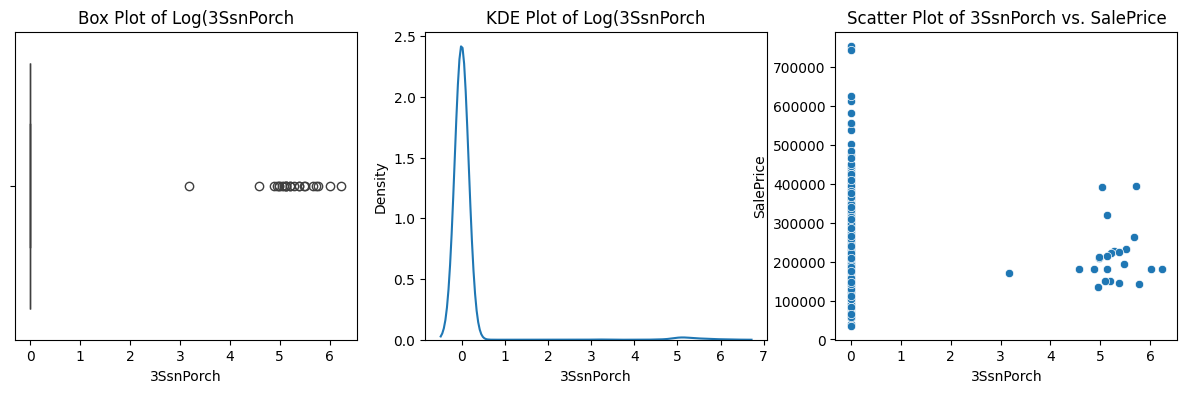

Box-Cox transformation not applicable for 3SsnPorch due to non-positive data.


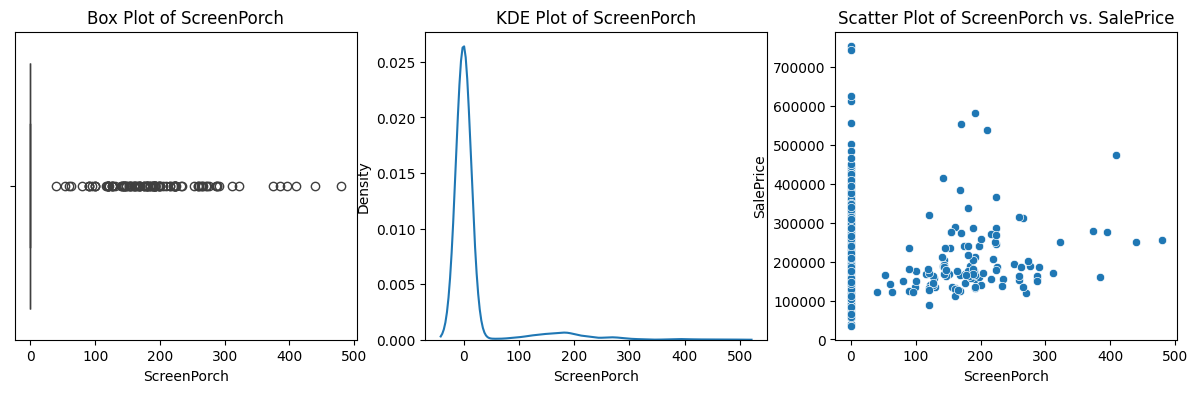

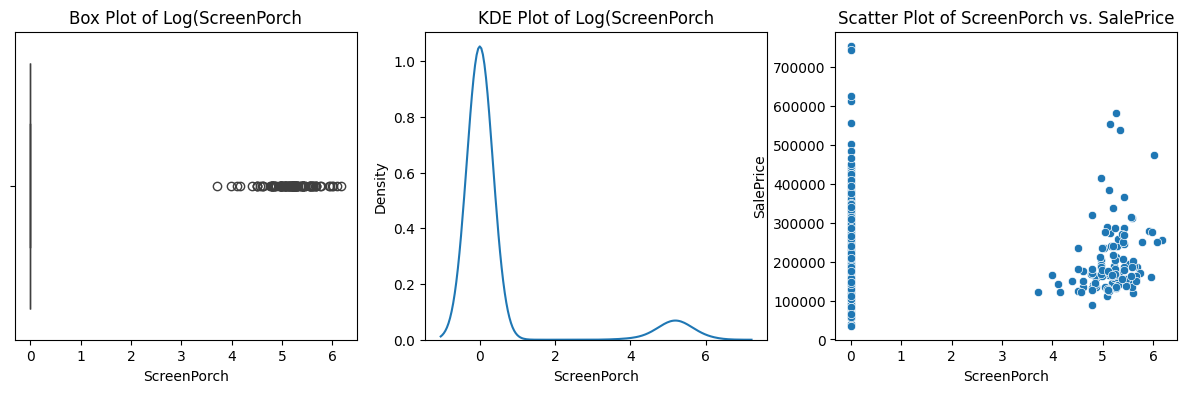

Box-Cox transformation not applicable for ScreenPorch due to non-positive data.


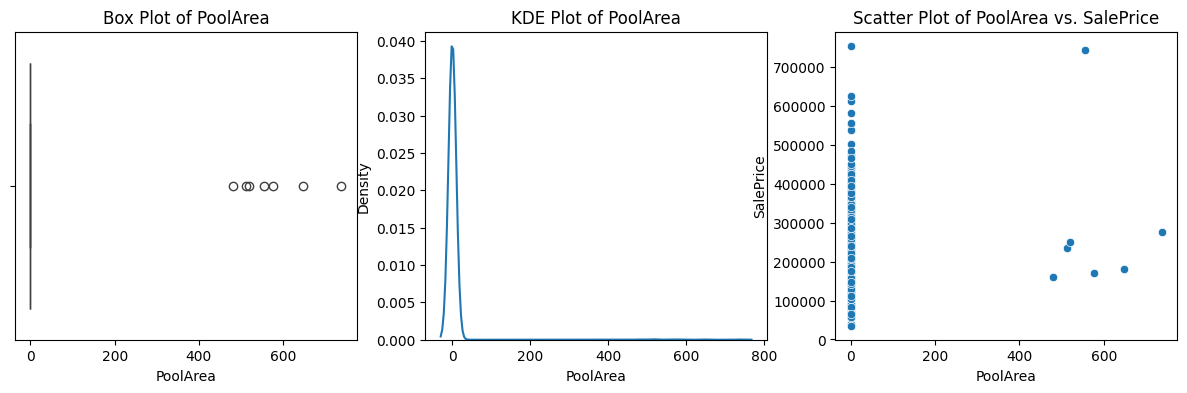

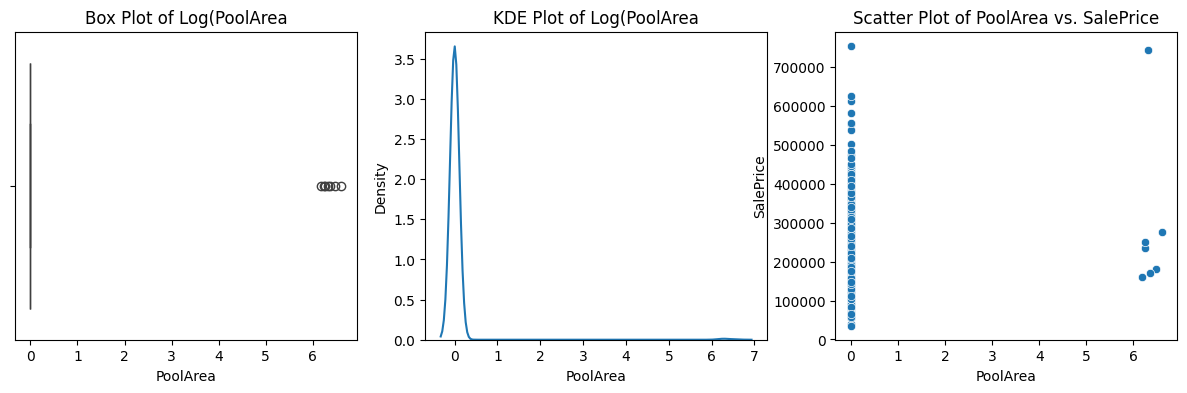

Box-Cox transformation not applicable for PoolArea due to non-positive data.


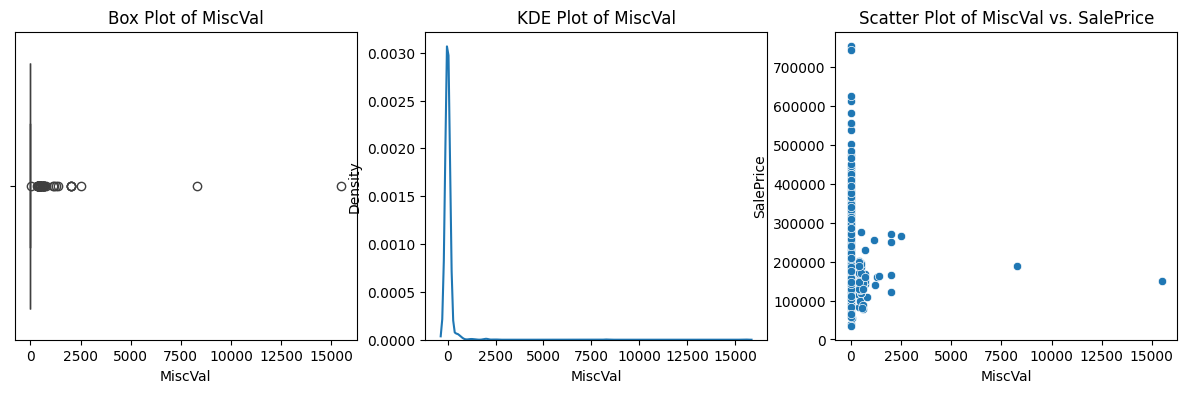

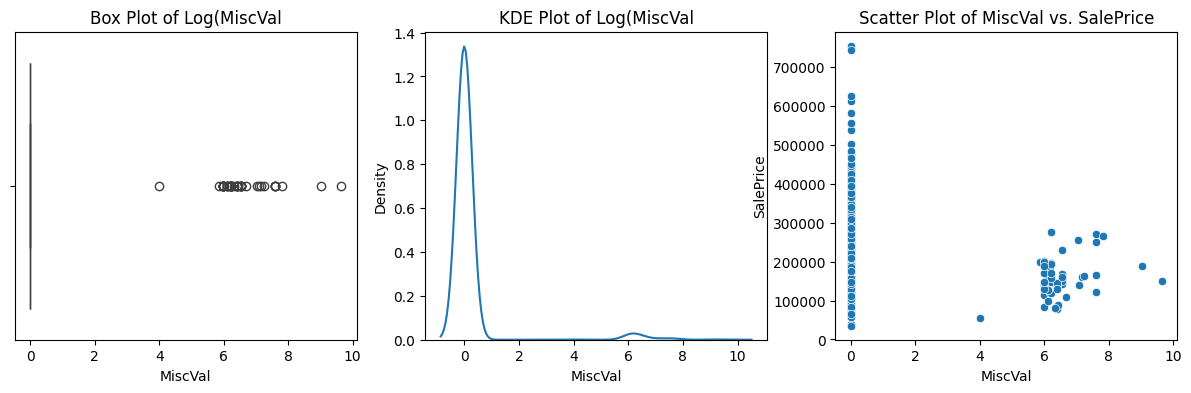

Box-Cox transformation not applicable for MiscVal due to non-positive data.


In [462]:
# Iterate through numerical columns
df_new = pd.DataFrame()
for column in df_numerical_columns:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Original Data (Before Transformation)
    sns.boxplot(x=df[column], ax=axes[0])
    axes[0].set_title(f'Box Plot of {column}')

    sns.kdeplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'KDE Plot of {column}')

    sns.scatterplot(x=df[column], y=df['SalePrice'], ax=axes[2])
    axes[2].set_title(f'Scatter Plot of {column} vs. SalePrice')
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Logarithmic Transformation
    log_data = np.log(df[column]+1)
    sns.boxplot(x=log_data, ax=axes[0])
    axes[0].set_title(f'Box Plot of Log({column}')
    
    # Logarithmic Transformation
    sns.kdeplot(x=log_data, ax=axes[1])

    axes[1].set_title(f'KDE Plot of Log({column}')
    
    sns.scatterplot(x=log_data, y=df['SalePrice'], ax=axes[2])
    axes[2].set_title(f'Scatter Plot of {column} vs. SalePrice')

    plt.show()
    df_new[column] = df[column]
    # Check if data is strictly positive for Box-Cox transformation
    if (df_new[column] > 0).all():
        print(column)
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))
        transformed_data, lambda_best_fit = stats.boxcox(df_new[column]+1)
        

        df_new[column] = transformed_data
        # Logarithmic Transformation
        sns.boxplot(x=transformed_data, ax=axes[0])
        axes[0].set_title(f'Box Plot of Box Cox({column}')
    
        # Logarithmic Transformation
        sns.kdeplot(x=transformed_data, ax=axes[1])

        axes[1].set_title(f'KDE Plot of Box Cox({column}')
    
        sns.scatterplot(x=transformed_data, y=df['SalePrice'], ax=axes[2])
        axes[2].set_title(f'Scatter Plot of {column} vs. SalePrice')

        plt.show()
        continue
    else:
        print(f"Box-Cox transformation not applicable for {column} due to non-positive data.")

In [463]:
df_new.LowQualFinSF.unique()

array([  0, 360, 528, 572, 144, 392, 390, 420, 473, 156,  80, 232, 481,
       120, 397, 384], dtype=int64)

In [464]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1338 non-null   float64
 1   MasVnrArea     1338 non-null   float64
 2   BsmtFinSF1     1338 non-null   int64  
 3   BsmtFinSF2     1338 non-null   int64  
 4   BsmtUnfSF      1338 non-null   int64  
 5   TotalBsmtSF    1338 non-null   float64
 6   1stFlrSF       1338 non-null   float64
 7   2ndFlrSF       1338 non-null   int64  
 8   LowQualFinSF   1338 non-null   int64  
 9   GrLivArea      1338 non-null   float64
 10  GarageArea     1338 non-null   float64
 11  WoodDeckSF     1338 non-null   int64  
 12  OpenPorchSF    1338 non-null   int64  
 13  EnclosedPorch  1338 non-null   int64  
 14  3SsnPorch      1338 non-null   int64  
 15  ScreenPorch    1338 non-null   int64  
 16  PoolArea       1338 non-null   int64  
 17  MiscVal        1338 non-null   int64  
dtypes: float64(6)

we can  change some columns to 0 and 1 instead of 0 and number like if it exits or not

In [465]:
binary_columns = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','2ndFlrSF','LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal' ]
df_new[binary_columns] = (df[binary_columns] > 0).astype(int)

In [466]:
df[df_new.columns] = df_new

In [467]:
df.head()

MSSubClass MSZoning    LotArea Street     Alley LotShape LandContour  \
0          60       RL   9.733065   Pave  No Alley      Reg         Lvl   
1          20       RL   9.880784   Pave  No Alley      Reg         Lvl   
2          60       RL  10.064828   Pave  No Alley      IR1         Lvl   
3          70       RL   9.874732   Pave  No Alley      IR1         Lvl   
4          60       RL  10.340827   Pave  No Alley      IR1         Lvl   

  Utilities LotConfig LandSlope  ... PoolArea   PoolQC     Fence  \
0    AllPub    Inside       Gtl  ...        0  No Pool  No Fence   
1    AllPub       FR2       Gtl  ...        0  No Pool  No Fence   
2    AllPub    Inside       Gtl  ...        0  No Pool  No Fence   
3    AllPub    Corner       Gtl  ...        0  No Pool  No Fence   
4    AllPub       FR2       Gtl  ...        0  No Pool  No Fence   

           MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0  No Other Categories       0       2    2008        WD         Normal   
1  No Other Categories       0       5    2007        WD         Normal   
2  No Other Categories       0       9    2008        WD         Normal   
3  No Other Categories       0       2    2006        WD        Abnorml   
4  No Other Categories       0      12    2008        WD         Normal   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 79 columns]

# USE SelectKBest

In [468]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(['MSSubClass','OverallQual','OverallCond'],axis=1)
df_numerical_columns.head()

LotArea  YearBuilt  YearRemodAdd  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0   9.733065       2003          2003        150    11.621414  4.771963   
1   9.880784       1976          1976        284    12.709267  4.953112   
2  10.064828       2001          2002        434    11.818739  4.806190   
3   9.874732       1915          1970        540    11.286384  4.826757   
4  10.340827       2000          2000        490    12.430663  4.908423   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  ...  BedroomAbvGr  \
0   5.902239             1             0         2  ...             3   
1   5.713247             0             1         2  ...             3   
2   5.928990             1             0         2  ...             3   
3   5.904755             1             0         1  ...             3   
4   6.055656             1             0         2  ...             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  MoSold  YrSold  SalePrice  
0   15.267353       2    2008     208500  
1   14.447940       5    2007     181500  
2   15.770933       9    2008     223500  
3   16.039922       2    2006     140000  
4   17.398328      12    2008     250000  

[5 rows x 21 columns]

In [469]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func = chi2, k=10)
x = df_numerical_columns.drop('SalePrice',axis=1)
y = df['SalePrice']
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_numerical_columns.columns)
#concat two dataframes for better visualization 
featureScoreschi2 = pd.concat([dfcolumns, dfscores],axis=1)
featureScoreschi2.columns = ['Features','Scorechi2']  #naming the dataframe columns
featureScoreschi2 = featureScoreschi2.sort_values(by='Scorechi2', ascending=False)
featureScoreschi2 = featureScoreschi2[:25].set_index(featureScoreschi2.columns[0])
featureScoreschi2

Scorechi2
Features                   
BsmtUnfSF     254273.312806
MoSold           700.660220
BsmtHalfBath     560.074829
Fireplaces       493.106438
HalfBath         463.020619
BsmtFullBath     395.909097
YearBuilt        387.257078
TotRmsAbvGrd     325.498945
GarageYrBlt      257.396587
GarageCars       207.033766
GarageArea       188.254987
FullBath         178.725558
YearRemodAdd     169.905385
BedroomAbvGr     147.602901
TotalBsmtSF       68.754198
LotArea           27.088911
KitchenAbvGr      16.442890
GrLivArea          6.866635
1stFlrSF           3.807347
YrSold             0.559841
SalePrice               NaN

In [470]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
x = df_numerical_columns.drop('SalePrice',axis=1)
y = df['SalePrice']
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_numerical_columns.columns)
#concat two dataframes for better visualization 
featureScoresf_regression = pd.concat([dfcolumns, dfscores],axis=1)
featureScoresf_regression.columns = ['Features','Score_f_regression']  #naming the dataframe columns
featureScoresf_regression = featureScoresf_regression.sort_values(by='Score_f_regression', ascending=False)
featureScoresf_regression = featureScoresf_regression[:25].set_index(featureScoresf_regression.columns[0])
featureScoresf_regression

Score_f_regression
Features                        
GrLivArea            1245.344862
GarageCars            927.630248
GarageArea            733.035125
TotalBsmtSF           711.229979
1stFlrSF              697.468507
FullBath              640.673098
TotRmsAbvGrd          584.936992
YearBuilt             455.642782
YearRemodAdd          448.753975
GarageYrBlt           403.727374
Fireplaces            330.691272
LotArea               224.440942
HalfBath               95.409593
BsmtFullBath           61.448389
BsmtUnfSF              50.963454
BedroomAbvGr           39.406532
KitchenAbvGr           16.790547
MoSold                  2.283759
BsmtHalfBath            1.217578
YrSold                  0.559008
SalePrice                    NaN

# Applying StandardScaler

In [471]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(['MSSubClass','OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold', 'YrSold'],axis=1)

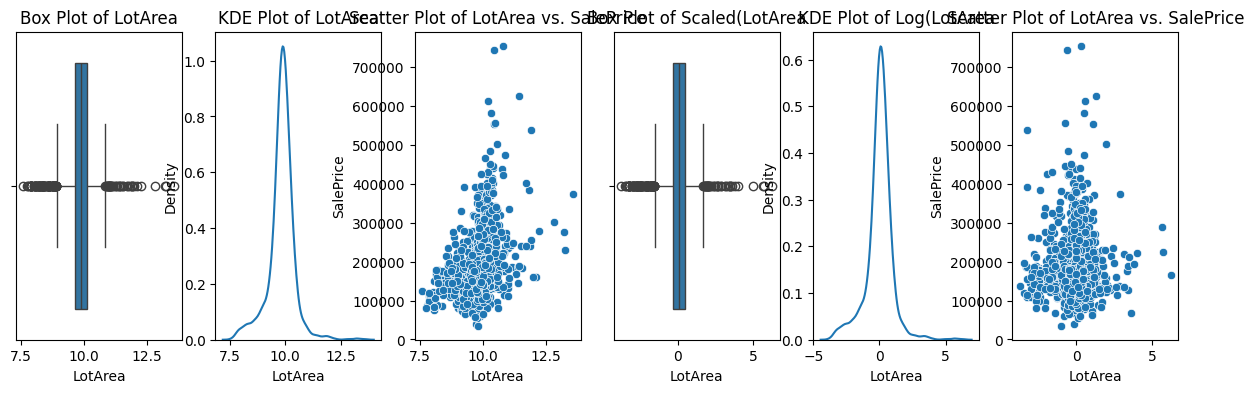

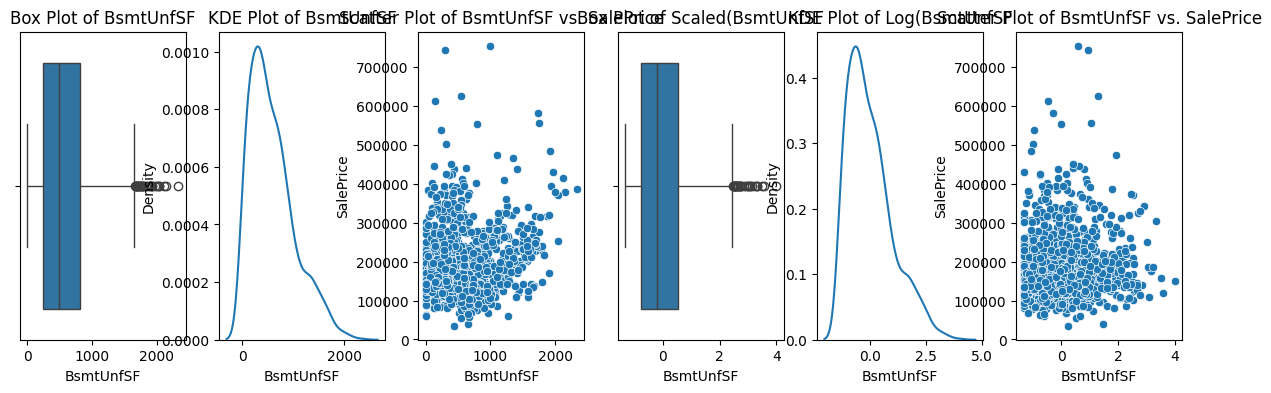

Box-Cox transformation not applicable for BsmtUnfSF due to non-positive data.


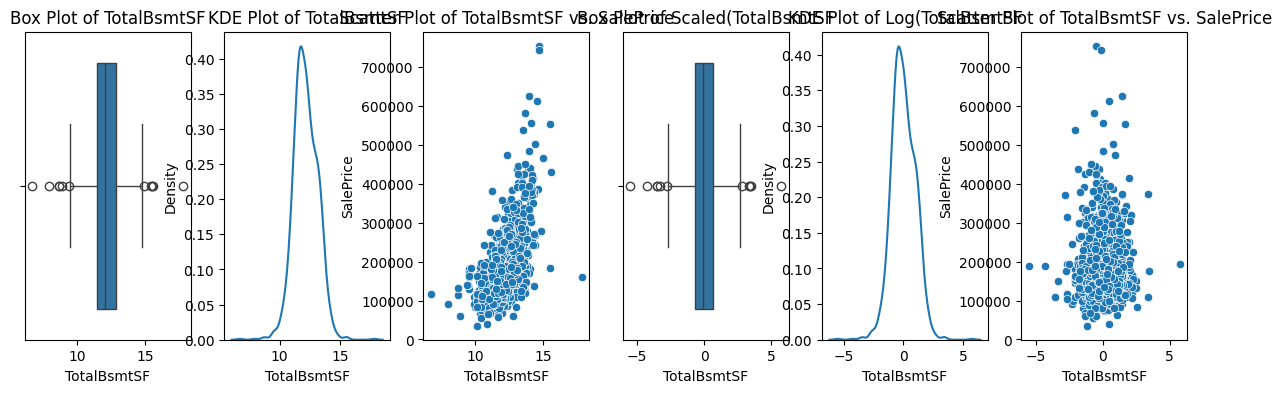

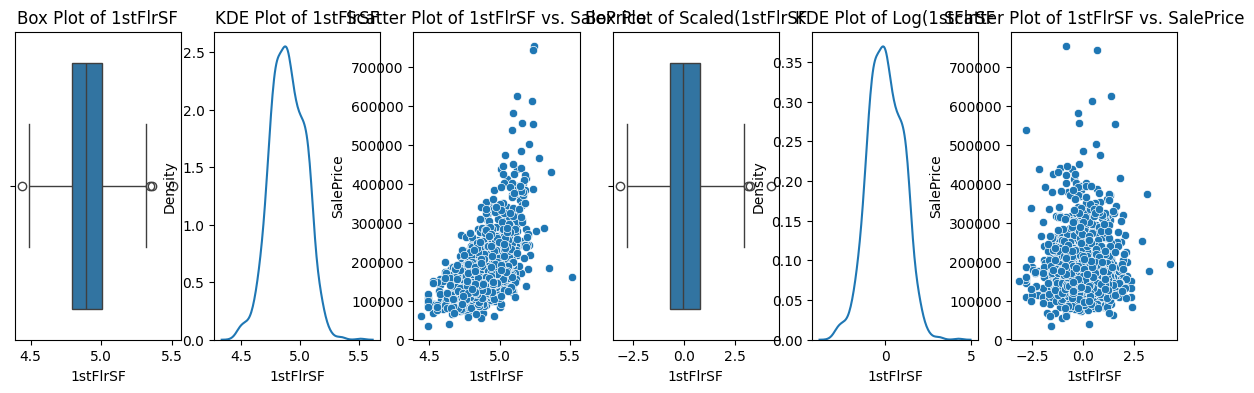

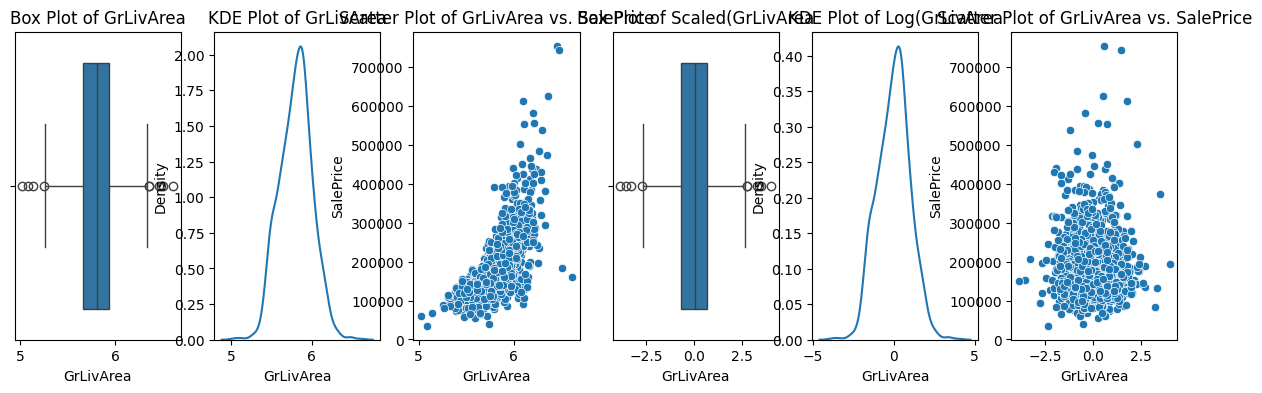

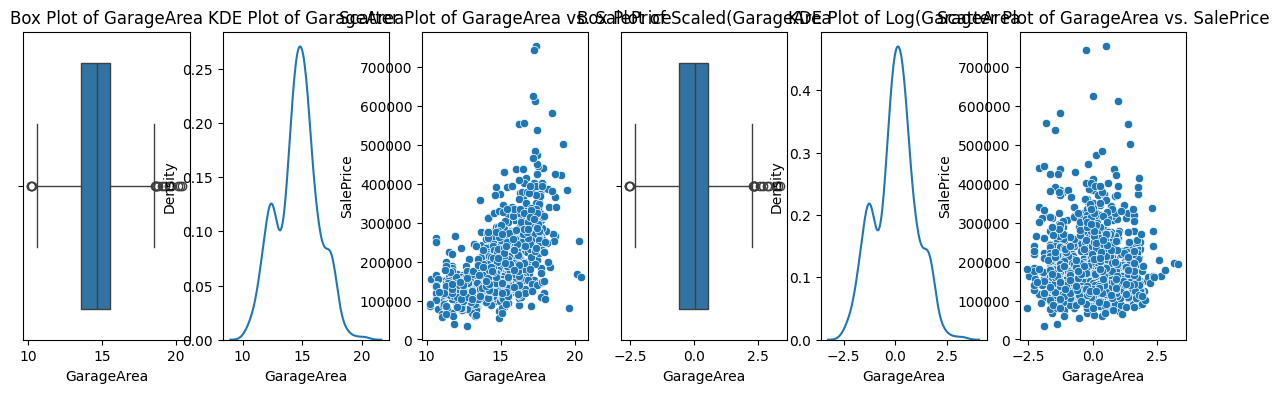

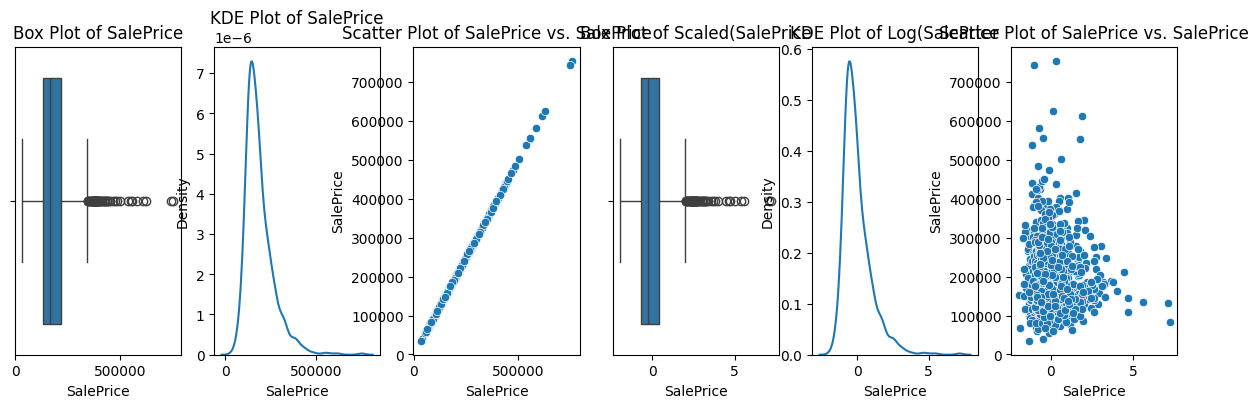

In [472]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaled = pd.DataFrame()
# Iterate through numerical columns
scaler = StandardScaler()
for column in df_numerical_columns:
    scaled_data=pd.DataFrame()
    fig, axes = plt.subplots(1, 6, figsize=(15, 4))
    # Original Data (Before Transformation)
    sns.boxplot(x=df[column], ax=axes[0])
    axes[0].set_title(f'Box Plot of {column}')

    sns.kdeplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'KDE Plot of {column}')

    sns.scatterplot(x=df[column], y=df['SalePrice'], ax=axes[2])
    axes[2].set_title(f'Scatter Plot of {column} vs. SalePrice')

    # Logarithmic Transformation
    scaled_data[['SalePrice',column]] = scaler.fit_transform(df_numerical_columns[['SalePrice',column]])
    scaled[column] = scaled_data[column]

    sns.boxplot(x=scaled_data[column], ax=axes[3])
    axes[3].set_title(f'Box Plot of Scaled({column}')
    
    sns.kdeplot(x=scaled_data[column], ax=axes[4])

    axes[4].set_title(f'KDE Plot of Log({column}')
    
    sns.scatterplot(x=scaled_data[column], y=df['SalePrice'], ax=axes[5])
    axes[5].set_title(f'Scatter Plot of {column} vs. SalePrice')

    plt.show()

    # Check if data is strictly positive for Box-Cox transformation
    if (df[column] > 0).all():
        continue
    else:
        print(f"Box-Cox transformation not applicable for {column} due to non-positive data.")

# Applying MinMaxScaler

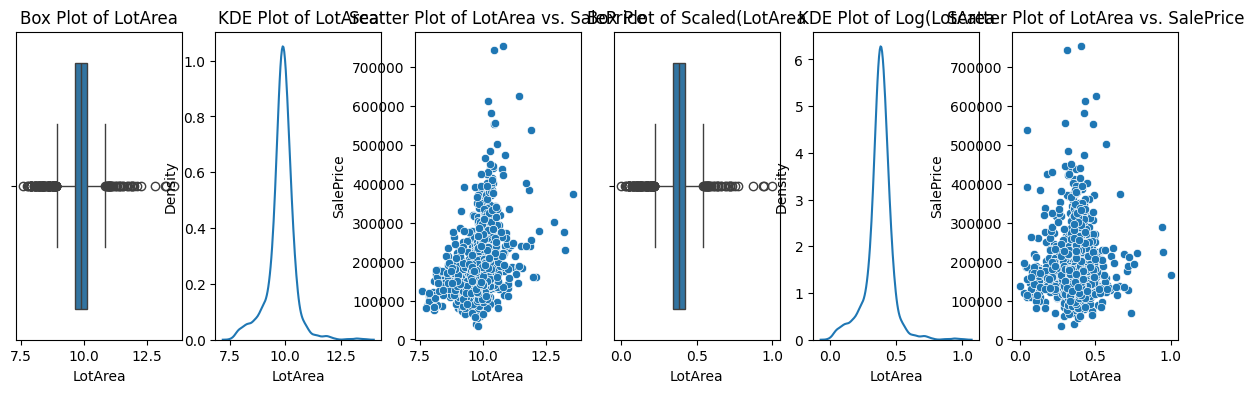

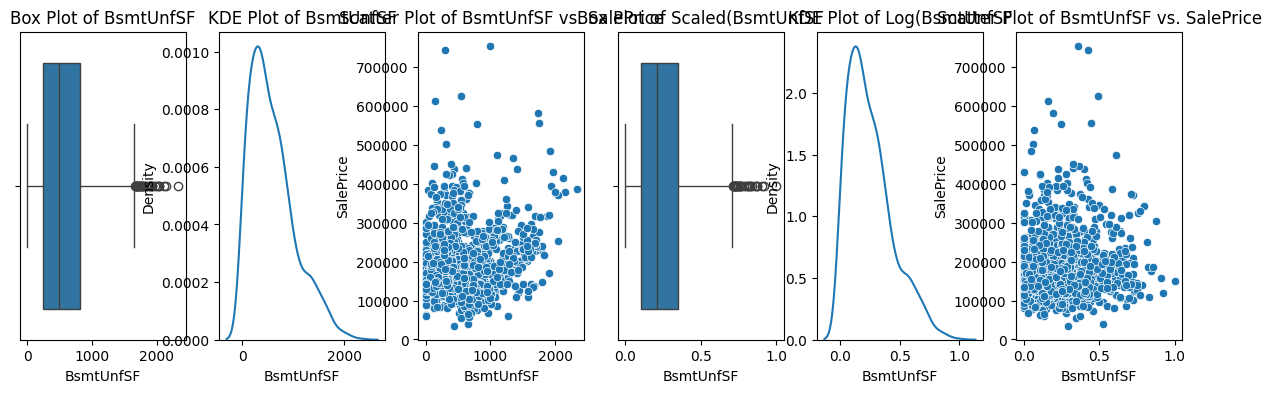

Box-Cox transformation not applicable for BsmtUnfSF due to non-positive data.


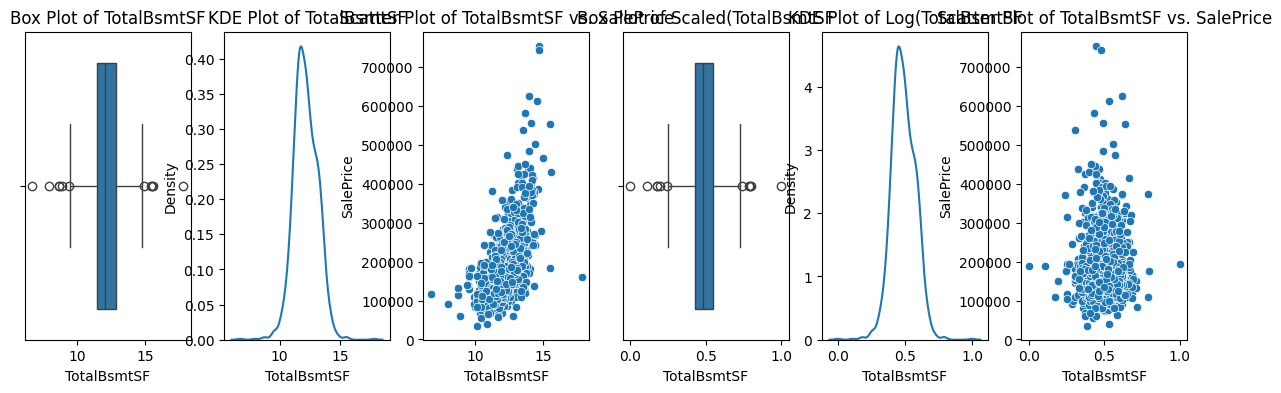

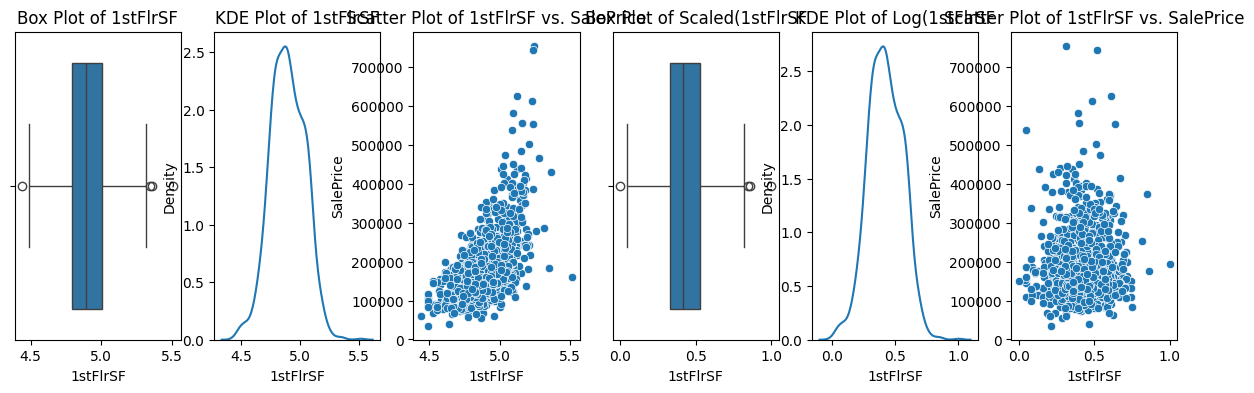

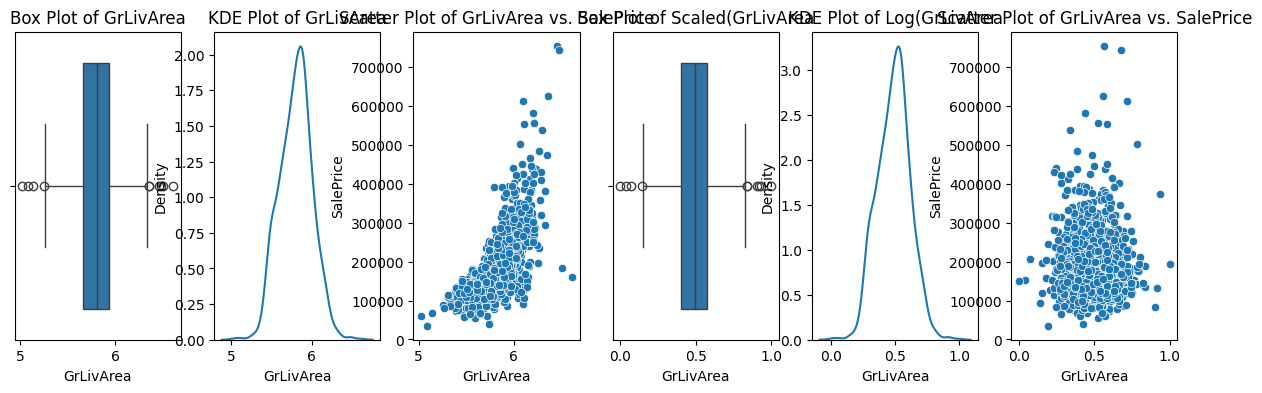

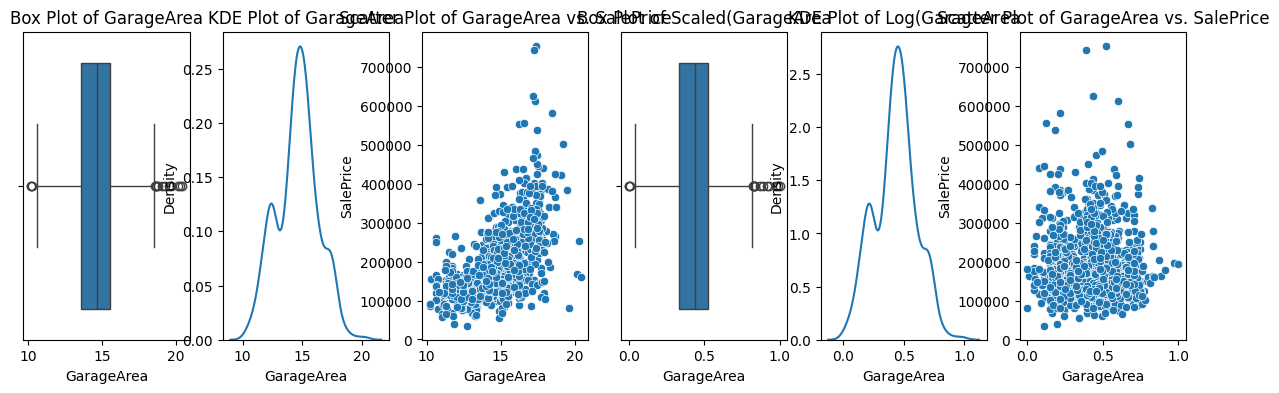

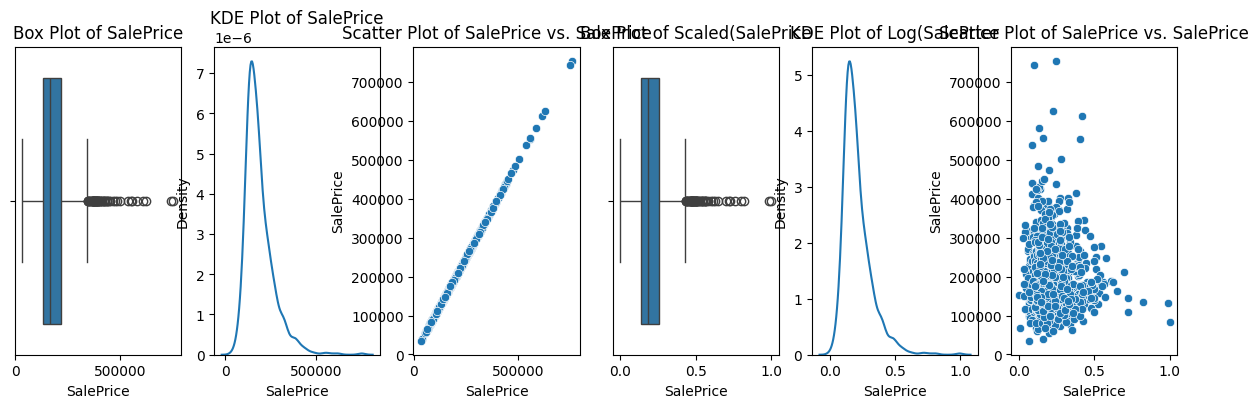

In [473]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Iterate through numerical columns
scaler = MinMaxScaler()
for column in df_numerical_columns:
    scaled_data=pd.DataFrame()
    fig, axes = plt.subplots(1, 6, figsize=(15, 4))

    # Original Data (Before Transformation)
    sns.boxplot(x=df[column], ax=axes[0])
    axes[0].set_title(f'Box Plot of {column}')

    sns.kdeplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'KDE Plot of {column}')

    sns.scatterplot(x=df[column], y=df['SalePrice'], ax=axes[2])
    axes[2].set_title(f'Scatter Plot of {column} vs. SalePrice')

    # Logarithmic Transformation
    scaled_data[['SalePrice',column]] = scaler.fit_transform(df_numerical_columns[['SalePrice',column]])
    sns.boxplot(x=scaled_data[column], ax=axes[3])
    axes[3].set_title(f'Box Plot of Scaled({column}')
    
    sns.kdeplot(x=scaled_data[column], ax=axes[4])

    axes[4].set_title(f'KDE Plot of Log({column}')
    
    sns.scatterplot(x=scaled_data[column], y=df['SalePrice'], ax=axes[5])
    axes[5].set_title(f'Scatter Plot of {column} vs. SalePrice')

    plt.show()

    # Check if data is strictly positive for Box-Cox transformation
    if (df[column] > 0).all():
        continue
    else:
        print(f"Box-Cox transformation not applicable for {column} due to non-positive data.")

GarageYrBlt     1.000000e+00
GarageCars      1.000000e+00
GarageArea      1.000000e+00
GarageQual      1.000000e+00
GarageCond      1.000000e+00
GarageFinish    9.999917e-01
GarageType      5.638676e-21
dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23192\3518596056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i] = label_encoder.fit_transform(features[i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23192\3518596056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i] = label_encoder.fit_transform(features[i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23192\3518596056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

<Axes: >

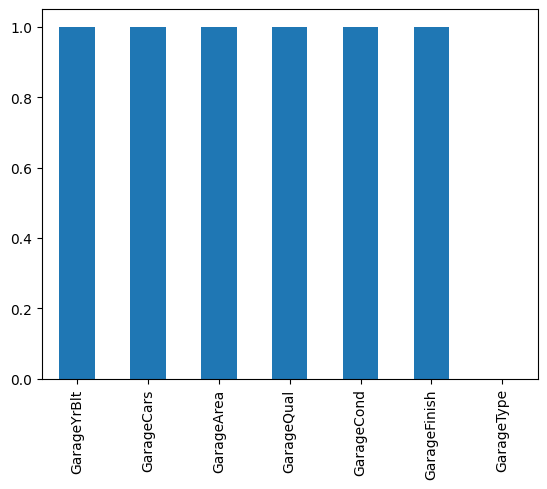

In [474]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
features = df[['GarageType','GarageYrBlt','GarageFinish','GarageCars', 'GarageArea','GarageQual', 'GarageCond']]
categorical_columns = features.select_dtypes(include=['object']).columns

for i in categorical_columns:
    features[i] = label_encoder.fit_transform(features[i])

target = df['SalePrice']
chi_scores = chi2(features,target)
p_valuesGarage = pd.Series(chi_scores[1],index = features.columns)
p_valuesGarage.sort_values(ascending = False , inplace = True)
print(p_valuesGarage)
p_valuesGarage.plot.bar()

It says that these variables aer independent of the repsone which are more than the sigificant level and can not be considered for model training and that will be taken is GarageType, GarageYrBlt, GarageArea as their p_values are less than 0.05

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1338 non-null   object
 1   BsmtCond      1338 non-null   object
 2   BsmtExposure  1338 non-null   object
 3   BsmtFinType1  1338 non-null   object
 4   BsmtFinSF1    1338 non-null   int32 
 5   BsmtFinType2  1338 non-null   object
 6   BsmtFinSF2    1338 non-null   int32 
 7   BsmtUnfSF     1338 non-null   int64 
dtypes: int32(2), int64(1), object(5)
memory usage: 115.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BsmtQual      1338 non-null   int32
 1   BsmtCond      1338 non-null   int32
 2   BsmtExposure  1338 non-null   int32
 3   BsmtFinType1  1338 non-null   int32
 4   BsmtFinSF1    1338 non-null   int32
 5   BsmtFinType2  1338 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23192\1965843217.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i] = label_encoder.fit_transform(features[i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23192\1965843217.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i] = label_encoder.fit_transform(features[i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23192\1965843217.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<Axes: >

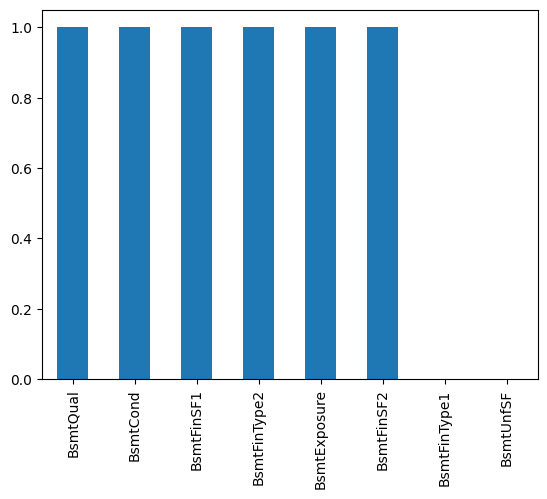

In [475]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
 
features = df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF']]
print(features.info())
categorical_columns = features.select_dtypes(include=['object']).columns

for i in categorical_columns:
    features[i] = label_encoder.fit_transform(features[i])
print(features.info())

target = df['SalePrice']
chi_scores = chi2(features,target)
p_valuesBsmt = pd.Series(chi_scores[1],index = features.columns)
p_valuesBsmt.sort_values(ascending = False , inplace = True)
print(p_valuesBsmt)
p_valuesBsmt.plot.bar()

BsmtFinType1, BsmtFinSF1, BsmtFinSF2      0.000000e+00
BsmtUnfSF       0.000000e+00

YrSold          1.000000
1stFlrSF        1.000000
TotRmsAbvGrd    1.000000
KitchenAbvGr    1.000000
BedroomAbvGr    1.000000
FullBath        1.000000
LotArea         1.000000
GarageCars      1.000000
GrLivArea       1.000000
TotalBsmtSF     1.000000
GarageArea      1.000000
YearRemodAdd    1.000000
OverallCond     1.000000
OverallQual     1.000000
GarageYrBlt     1.000000
YearBuilt       1.000000
BsmtFullBath    1.000000
HalfBath        0.999999
Fireplaces      0.999937
BsmtHalfBath    0.956544
MoSold          0.012392
BsmtUnfSF       0.000000
MSSubClass      0.000000
dtype: float64


<Axes: >

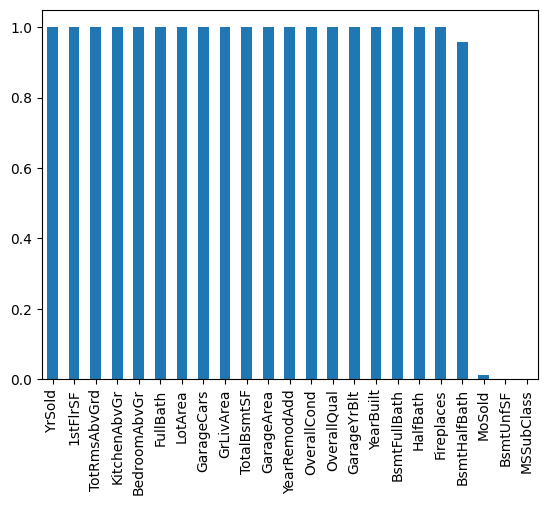

In [476]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

numerical_cloumns = df.select_dtypes(include=['float64','int64']).columns
features = df[numerical_cloumns]
features = features.drop(['SalePrice'],axis=1)

target = df['SalePrice']
chi_scores = chi2(features,target)
p_valuesNumeric = pd.Series(chi_scores[1],index = features.columns)
p_valuesNumeric.sort_values(ascending = False , inplace = True)
print(p_valuesNumeric)
p_valuesNumeric.plot.bar()

In [477]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

P_valuesAll = []
for i in df.columns:
    contingency_table = pd.crosstab(df[i], df['SalePrice'])

    chi2, p, _, _ = chi2_contingency(contingency_table)

    #print("Contingency Table:")
    #print(contingency_table)
    
    
    if p <= 0.05: 
        print(i)
        #print(f"Chi-Squared Statistic: {chi2}")
        #print(f"P-Value: {p}")
        P_valuesAll.append([i,chi2,p])
        
#print(P_values)
print(len(P_valuesAll))

MSZoning
LotArea
Street
LotShape
Neighborhood
Condition2
OverallQual
OverallCond
MasVnrType
MasVnrArea
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtUnfSF
TotalBsmtSF
CentralAir
Electrical
1stFlrSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
KitchenQual
TotRmsAbvGrd
Fireplaces
FireplaceQu
GarageType
GarageFinish
GarageCars
GarageArea
GarageQual
WoodDeckSF
OpenPorchSF
SaleType
SaleCondition
SalePrice
39


## Plot all Categorical Columns with SalePrice

In [478]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_columns = df.select_dtypes(include=['object']).columns
len(categorical_columns)

43

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23192\3036722625.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23192\3036722625.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23192\3036722625.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23192\3036722625.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23192\3036722625.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


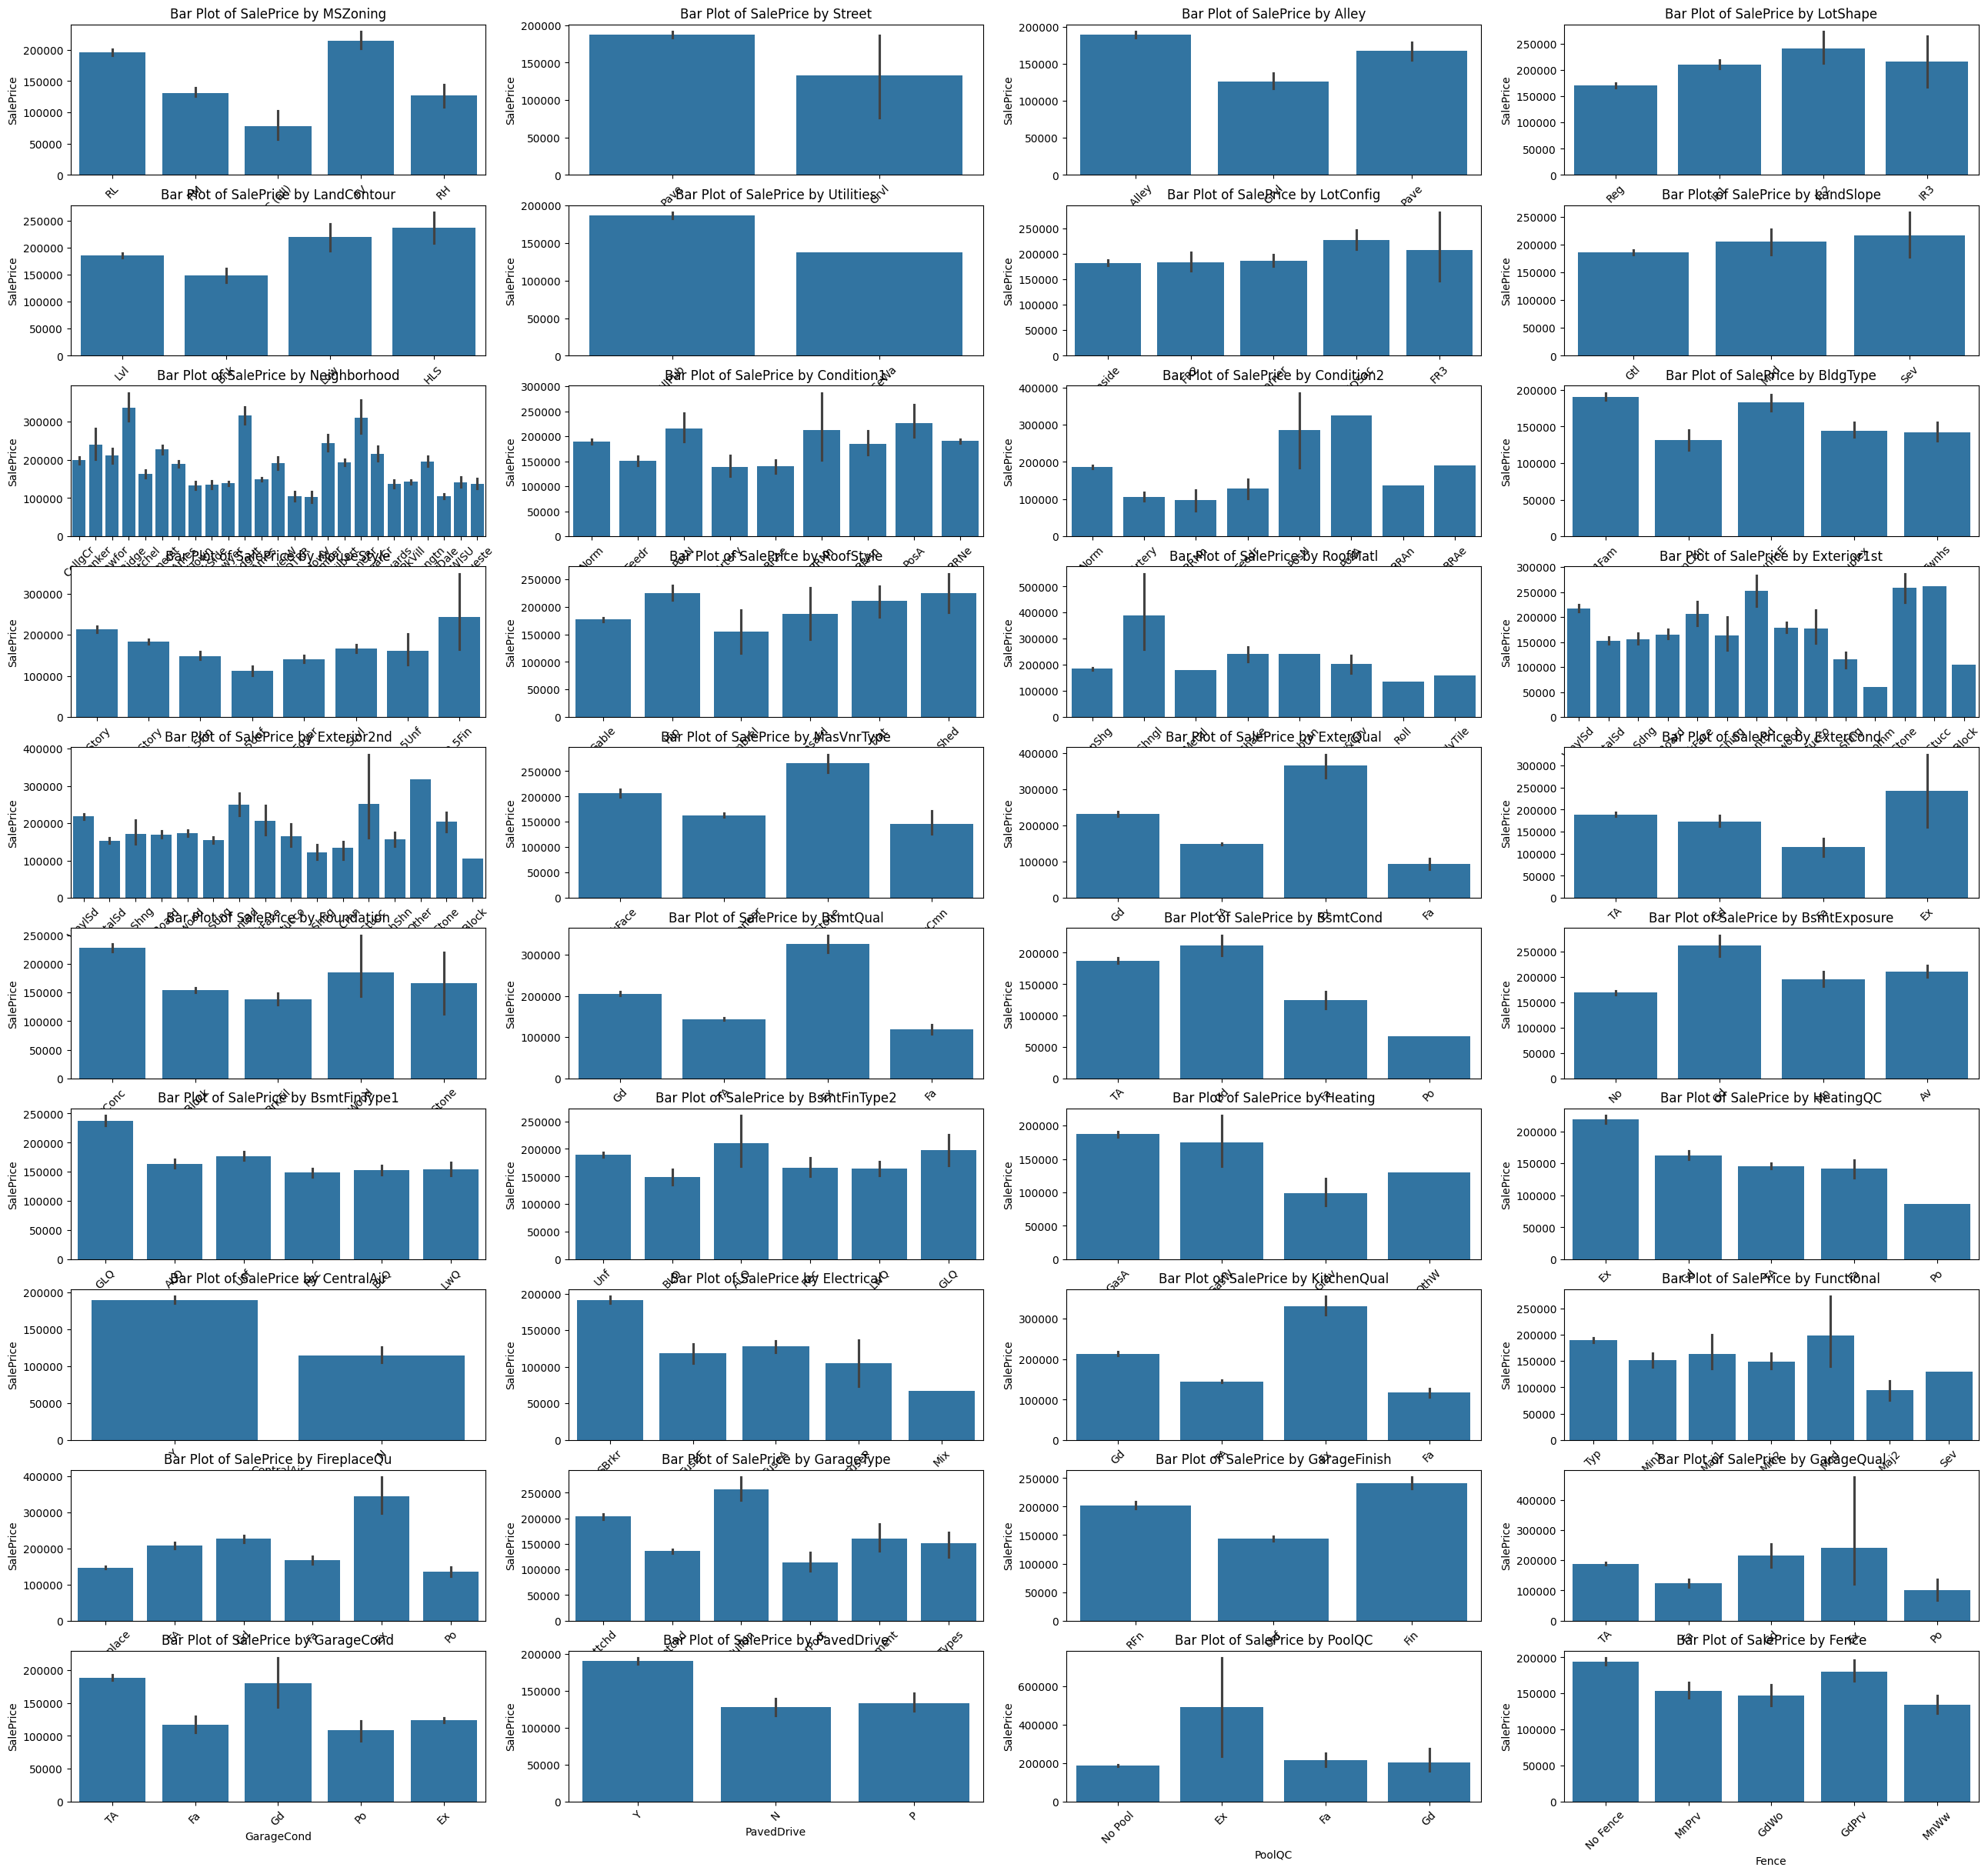

In [479]:
# Get a list of all categorical columns in your DataFrame
fig, axes = plt.subplots(10, 4, figsize=(32, 30))
num_rows = 10
num_cols = 4
i = 0

for column in categorical_columns:
    if i >= num_rows * num_cols:
        break 
    ax = axes[i // num_cols, i % num_cols]  
    sns.barplot(data=df, x=column, y='SalePrice', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
    ax.set_title(f'Bar Plot of SalePrice by {column}')
    i += 1

## Correlation of numerical Columns

In [480]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df_numerical_columns = df[numerical_columns].drop(['MSSubClass','OverallQual','OverallCond'],axis=1)

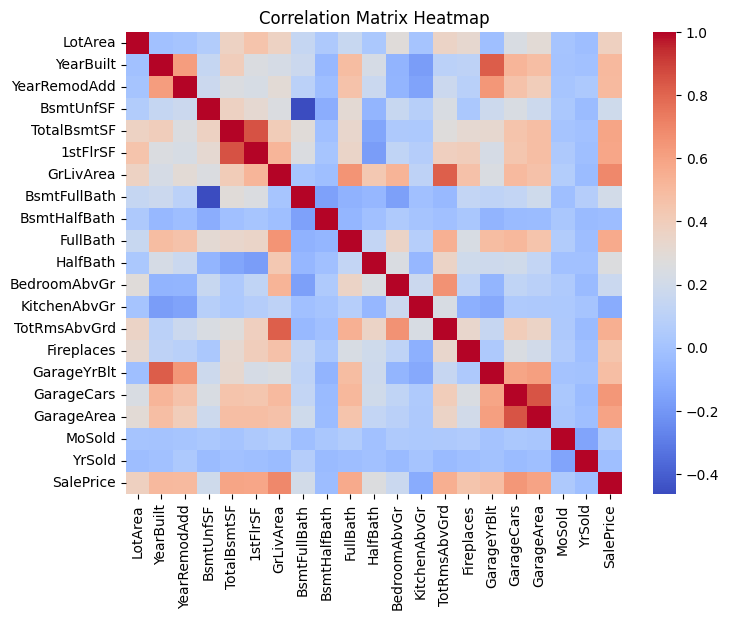

In [481]:
correlation_matrix = df_numerical_columns.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [482]:
correlations = df_numerical_columns.corr()['SalePrice']
# Select features with a correlation above a certain threshold
threshold = 0.45
selected_features = correlations[abs(correlations) > threshold].index
selected_features

Index(['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

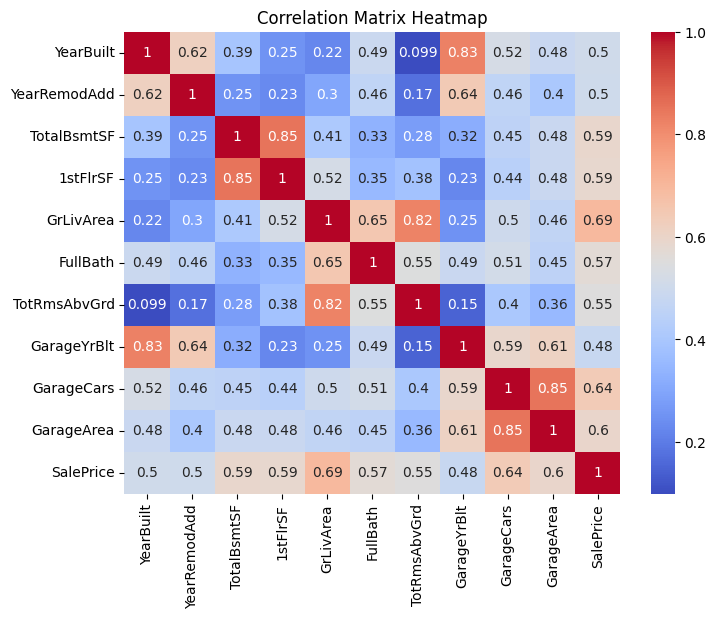

In [483]:
correlations_2 = df[selected_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlations_2, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [484]:
df_selected_features = df[selected_features].drop(['TotalBsmtSF','TotRmsAbvGrd', 'GarageArea','GarageYrBlt'],axis = 1)
df_selected_features.columns

Index(['YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'SalePrice'],
      dtype='object')

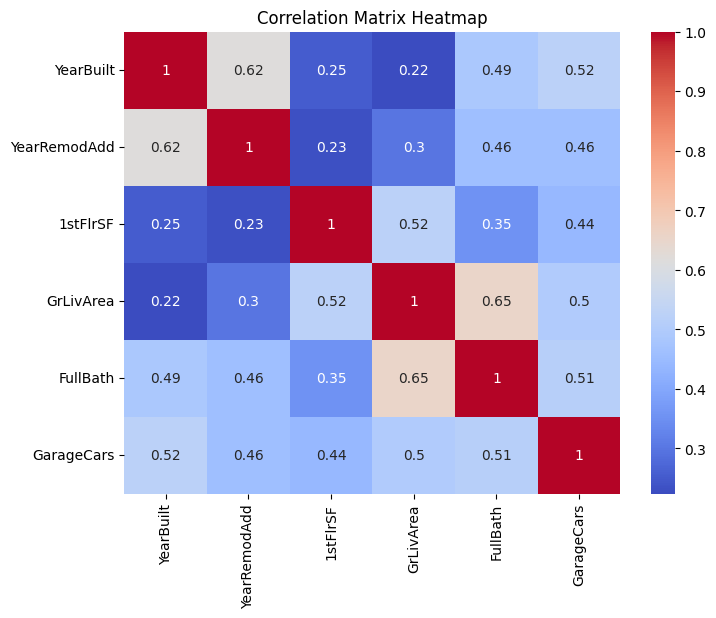

In [485]:
correlation_matrix = df_selected_features.drop('SalePrice',axis=1).corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap") 
plt.title("Correlation Matrix Heatmap")
plt.show()

In [486]:
selected_numeric_feartures = correlation_matrix.columns
selected_numeric_feartures

Index(['YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars'],
      dtype='object')

In [487]:
p_valuesGarage = pd.DataFrame(p_valuesGarage)
p_valuesBsmt = pd.DataFrame(p_valuesBsmt)
p_valuesNumeric = pd.DataFrame(p_valuesNumeric)
P_valuesAll = pd.DataFrame(P_valuesAll)


In [488]:
P_valuesAll = P_valuesAll.drop(P_valuesAll.columns[1],axis=1)

In [489]:
P_valuesAll = P_valuesAll.set_index(P_valuesAll.columns[0])

In [490]:
merged_p_values = pd.merge(p_valuesGarage, p_valuesBsmt, how='outer', left_index=True, right_index=True)
merged_p_values = pd.merge(merged_p_values, p_valuesNumeric, how='outer', left_index=True, right_index=True)
merged_p_values = pd.merge(merged_p_values, P_valuesAll, how='outer', left_index=True, right_index=True)
merged_p_values = pd.merge(merged_p_values, featureScoresf_regression, how='outer', left_index=True, right_index=True)
merged_p_values = pd.merge(merged_p_values, featureScoreschi2, how='outer', left_index=True, right_index=True)
new_column_names = ['p_valuesGarage', 'p_valuesBsmt', 'p_valuesNumeric', 'P_valuesAll','Score_f_regression','Score_chi2']
merged_p_values.columns = new_column_names
merged_p_values

p_valuesGarage  p_valuesBsmt  p_valuesNumeric    P_valuesAll  \
1stFlrSF                  NaN           NaN         1.000000   4.640861e-99   
BedroomAbvGr              NaN           NaN         1.000000            NaN   
BsmtCond                  NaN      1.000000              NaN   1.820748e-31   
BsmtExposure              NaN      1.000000              NaN   8.486319e-07   
BsmtFinSF1                NaN      1.000000              NaN            NaN   
BsmtFinSF2                NaN      0.999994              NaN            NaN   
BsmtFinType1              NaN      0.000239              NaN            NaN   
BsmtFinType2              NaN      1.000000              NaN            NaN   
BsmtFullBath              NaN           NaN         1.000000   2.014842e-04   
BsmtHalfBath              NaN           NaN         0.956544   2.216769e-29   
BsmtQual                  NaN      1.000000              NaN   1.645061e-21   
BsmtUnfSF                 NaN      0.000000         0.000000   1.212606e-76   
CentralAir                NaN           NaN              NaN   1.034402e-05   
Condition2                NaN           NaN              NaN   3.610187e-02   
Electrical                NaN           NaN              NaN   4.069444e-34   
ExterQual                 NaN           NaN              NaN   1.973762e-41   
FireplaceQu               NaN           NaN              NaN   1.416316e-06   
Fireplaces                NaN           NaN         0.999937   4.710827e-02   
Foundation                NaN           NaN              NaN   4.267132e-03   
FullBath                  NaN           NaN         1.000000   5.810669e-32   
GarageArea       1.000000e+00           NaN         1.000000   0.000000e+00   
GarageCars       1.000000e+00           NaN         1.000000   8.974314e-26   
GarageCond       1.000000e+00           NaN              NaN            NaN   
GarageFinish     9.999917e-01           NaN              NaN   3.501918e-09   
GarageQual       1.000000e+00           NaN              NaN   4.920688e-14   
GarageType       5.638676e-21           NaN              NaN   3.823577e-02   
GarageYrBlt      1.000000e+00           NaN         1.000000            NaN   
GrLivArea                 NaN           NaN         1.000000   7.477938e-83   
HalfBath                  NaN           NaN         0.999999   4.023131e-08   
KitchenAbvGr              NaN           NaN         1.000000            NaN   
KitchenQual               NaN           NaN              NaN   9.045652e-22   
LotArea                   NaN           NaN         1.000000   2.929183e-79   
LotShape                  NaN           NaN              NaN   1.132441e-09   
MSSubClass                NaN           NaN         0.000000            NaN   
MSZoning                  NaN           NaN              NaN   1.168484e-25   
MasVnrArea                NaN           NaN              NaN   2.431168e-02   
MasVnrType                NaN           NaN              NaN   1.145017e-05   
MoSold                    NaN           NaN         0.012392            NaN   
Neighborhood              NaN           NaN              NaN   4.161487e-07   
OpenPorchSF               NaN           NaN              NaN   3.647224e-05   
OverallCond               NaN           NaN         1.000000   3.527247e-10   
OverallQual               NaN           NaN         1.000000   1.797300e-87   
SaleCondition             NaN           NaN              NaN   1.424568e-29   
SalePrice                 NaN           NaN              NaN   0.000000e+00   
SaleType                  NaN           NaN              NaN   3.052067e-40   
Street                    NaN           NaN              NaN   1.751220e-28   
TotRmsAbvGrd              NaN           NaN         1.000000   2.011873e-19   
TotalBsmtSF               NaN           NaN         1.000000  1.525499e-231   
WoodDeckSF                NaN           NaN              NaN   2.674498e-02   
YearBuilt                 NaN           NaN         1.000000     

In [491]:
selected_numeric_features = ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageYrBlt', 'GarageCars']

# Create a DataFrame with 1 as values and selected_numeric_features as index
selected_numeric_feartures = pd.DataFrame(1, index=selected_numeric_features, columns=["Value"])
selected_numeric_feartures

Value
YearBuilt         1
YearRemodAdd      1
MasVnrArea        1
TotalBsmtSF       1
GrLivArea         1
FullBath          1
Fireplaces        1
GarageYrBlt       1
GarageCars        1

In [492]:
merged_p_values = pd.merge(merged_p_values, selected_numeric_feartures, how='outer', left_index=True, right_index=True)

In [493]:
ALL_Features = pd.DataFrame(None, index=df.columns, columns=["ALL"])

merged_p_values = pd.merge(merged_p_values, ALL_Features, how='outer', left_index=True, right_index=True)

In [494]:
merged_p_values

p_valuesGarage  p_valuesBsmt  p_valuesNumeric   P_valuesAll  \
1stFlrSF                 NaN           NaN              1.0  4.640861e-99   
2ndFlrSF                 NaN           NaN              NaN           NaN   
3SsnPorch                NaN           NaN              NaN           NaN   
Alley                    NaN           NaN              NaN           NaN   
BedroomAbvGr             NaN           NaN              1.0           NaN   
...                      ...           ...              ...           ...   
Utilities                NaN           NaN              NaN           NaN   
WoodDeckSF               NaN           NaN              NaN  2.674498e-02   
YearBuilt                NaN           NaN              1.0           NaN   
YearRemodAdd             NaN           NaN              1.0           NaN   
YrSold                   NaN           NaN              1.0           NaN   

              Score_f_regression  Score_chi2  Value  ALL  
1stFlrSF              697.468507    3.807347    NaN  NaN  
2ndFlrSF                     NaN         NaN    NaN  NaN  
3SsnPorch                    NaN         NaN    NaN  NaN  
Alley                        NaN         NaN    NaN  NaN  
BedroomAbvGr           39.406532  147.602901    NaN  NaN  
...                          ...         ...    ...  ...  
Utilities                    NaN         NaN    NaN  NaN  
WoodDeckSF                   NaN         NaN    NaN  NaN  
YearBuilt             455.642782  387.257078    1.0  NaN  
YearRemodAdd          448.753975  169.905385    1.0  NaN  
YrSold                  0.559008    0.559841    NaN  NaN  

[79 rows x 8 columns]

In [495]:
merged_p_values.index

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea',
       'PoolQC', 'RoofMatl', 'R

In [496]:
values = ['yes','yes','yes','yes','yes','yes',
          'yes','yes','yes','no','no',
          'no','yes','no','no',
          'no','yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes',  'yes', 'yes',
'yes', 'yes', 'yes','no', 'no', 'no', 'no','no','yes','no', 'no', 'yes' , 'yes', 'yes', 'no', 
 'no', 'yes', 'yes','no','no','no','yes','no','yes','no','no','yes','no','yes','yes','no','yes'
 ,'yes','yes','no','no','yes','yes',None,'yes','yes','yes','no','yes','yes','yes','yes','yes','no']
decisions = pd.DataFrame(values, index=df.columns, columns=["decisions"])
merged_p_values = pd.merge(merged_p_values, decisions, how='outer', left_index=True, right_index=True)

In [497]:
merged_p_values.tail(40)

p_valuesGarage  p_valuesBsmt  p_valuesNumeric    P_valuesAll  \
HalfBath                  NaN           NaN         0.999999   4.023131e-08   
Heating                   NaN           NaN              NaN            NaN   
HeatingQC                 NaN           NaN              NaN            NaN   
HouseStyle                NaN           NaN              NaN            NaN   
KitchenAbvGr              NaN           NaN         1.000000            NaN   
KitchenQual               NaN           NaN              NaN   9.045652e-22   
LandContour               NaN           NaN              NaN            NaN   
LandSlope                 NaN           NaN              NaN            NaN   
LotArea                   NaN           NaN         1.000000   2.929183e-79   
LotConfig                 NaN           NaN              NaN            NaN   
LotShape                  NaN           NaN              NaN   1.132441e-09   
LowQualFinSF              NaN           NaN              NaN            NaN   
MSSubClass                NaN           NaN         0.000000            NaN   
MSZoning                  NaN           NaN              NaN   1.168484e-25   
MasVnrArea                NaN           NaN              NaN   2.431168e-02   
MasVnrType                NaN           NaN              NaN   1.145017e-05   
MiscFeature               NaN           NaN              NaN            NaN   
MiscVal                   NaN           NaN              NaN            NaN   
MoSold                    NaN           NaN         0.012392            NaN   
Neighborhood              NaN           NaN              NaN   4.161487e-07   
OpenPorchSF               NaN           NaN              NaN   3.647224e-05   
OverallCond               NaN           NaN         1.000000   3.527247e-10   
OverallQual               NaN           NaN         1.000000   1.797300e-87   
PavedDrive                NaN           NaN              NaN            NaN   
PoolArea                  NaN           NaN              NaN            NaN   
PoolQC                    NaN           NaN              NaN            NaN   
RoofMatl                  NaN           NaN              NaN            NaN   
RoofStyle                 NaN           NaN              NaN            NaN   
SaleCondition             NaN           NaN              NaN   1.424568e-29   
SalePrice                 NaN           NaN              NaN   0.000000e+00   
SaleType                  NaN           NaN              NaN   3.052067e-40   
ScreenPorch               NaN           NaN              NaN            NaN   
Street                    NaN           NaN              NaN   1.751220e-28   
TotRmsAbvGrd              NaN           NaN         1.000000   2.011873e-19   
TotalBsmtSF               NaN           NaN         1.000000  1.525499e-231   
Utilities                 NaN           NaN              NaN            NaN   
WoodDeckSF                NaN           NaN              NaN   2.674498e-02   
YearBuilt                 NaN           NaN         1.000000            NaN   
YearRemodAdd              NaN           NaN         1.000000            NaN   
YrSold                    NaN           NaN         1.000000            NaN   

               Score_f_regression  Score_chi2  Value  ALL decisions  
HalfBath                95.409593  463.020619    NaN  NaN        no  
Heating                       NaN         NaN    NaN  NaN        no  
HeatingQC                     NaN         NaN    NaN  NaN       yes  
HouseStyle                    NaN         NaN    NaN  NaN        no  
KitchenAbvGr            16.790547   16.442890    NaN  NaN        no  
KitchenQual                   NaN         NaN    NaN  NaN       yes  
LandContour                   NaN         NaN    NaN  NaN       yes  
LandSlope                     NaN         NaN    NaN  NaN        no  
LotArea                224.440942   27.088911    NaN  NaN       yes  
LotConfig                     NaN         NaN    NaN  NaN       yes  
LotSh

# Original

In [548]:
SelectedFeatures = ['1stFlrSF', 'BedroomAbvGr', 'BsmtHalfBath', 'BsmtUnfSF','ExterQual','Fireplaces','FullBath', 'GarageCars','GrLivArea','LotArea','Neighborhood','OverallQual','TotRmsAbvGrd','TotalBsmtSF','YearBuilt','YearRemodAdd','SalePrice']
df_last = df[SelectedFeatures]

In [549]:
df_last = pd.get_dummies(df_last, columns=['ExterQual', 'Neighborhood'], prefix=['ExterQual', 'Neighborhood'])

In [550]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]


columns_to_remove_outliers = df_last.select_dtypes(include=['float64','int64']).columns

# Apply the function to each column where you want to remove outliers
for column_name in columns_to_remove_outliers:

    df_last[column_name] = remove_outliers(df_last[column_name])

In [555]:
df_last = df_last.dropna()

In [556]:
X = df_last.drop('SalePrice',axis=1)
y = df_last['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Example for classification
model = XGBRegressor(learning_rate=0.045, n_estimators = 800, max_depth = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 17818.54
R-squared (R²): 0.9104317836001947


In [544]:
# Back to Trails

In [546]:
SelectedFeatures = ['1stFlrSF', 'BedroomAbvGr', 'BsmtUnfSF','Fireplaces','FullBath', 'GarageCars','GrLivArea','LotArea','MasVnrArea','Neighborhood','OverallQual','TotalBsmtSF','YearBuilt','YearRemodAdd','SalePrice']
df_last = df[SelectedFeatures]

In [547]:
# Assuming 'df' is your DataFrame
df_last = pd.get_dummies(df_last, columns=['Neighborhood'], prefix=['Neighborhood'])
#df_last = pd.get_dummies(df_last, columns=['ExterQual', 'Neighborhood'], prefix=['ExterQual', 'Neighborhood'])

In [501]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1stFlrSF              1338 non-null   float64
 1   BedroomAbvGr          1338 non-null   int64  
 2   BsmtUnfSF             1338 non-null   int64  
 3   Fireplaces            1338 non-null   int64  
 4   FullBath              1338 non-null   int64  
 5   GarageCars            1338 non-null   int64  
 6   GrLivArea             1338 non-null   float64
 7   LotArea               1338 non-null   float64
 8   MasVnrArea            1338 non-null   int32  
 9   OverallQual           1338 non-null   int64  
 10  TotalBsmtSF           1338 non-null   float64
 11  YearBuilt             1338 non-null   int64  
 12  YearRemodAdd          1338 non-null   int64  
 13  SalePrice             1338 non-null   int64  
 14  Neighborhood_Blmngtn  1338 non-null   bool   
 15  Neighborhood_Blueste  1338

In [502]:
df_last.describe()

1stFlrSF  BedroomAbvGr    BsmtUnfSF   Fireplaces     FullBath  \
count  1338.000000   1338.000000  1338.000000  1338.000000  1338.000000   
mean      4.895425      2.864723   582.494768     0.648729     1.575486   
std       0.144995      0.776677   439.950528     0.645393     0.547570   
min       4.440820      0.000000     0.000000     0.000000     0.000000   
25%       4.792613      2.000000   248.000000     0.000000     1.000000   
50%       4.889025      3.000000   489.000000     1.000000     2.000000   
75%       5.004752      3.000000   815.750000     1.000000     2.000000   
max       5.512133      6.000000  2336.000000     3.000000     3.000000   

       GarageCars    GrLivArea      LotArea   MasVnrArea  OverallQual  \
count  1338.00000  1338.000000  1338.000000  1338.000000  1338.000000   
mean      1.87145     5.801848     9.834061     0.431988     6.219731   
std       0.63428     0.200699     0.598143     0.495538     1.324472   
min       1.00000     5.025536     7.601070     0.000000     2.000000   
25%       1.00000     5.660160     9.632233     0.000000     5.000000   
50%       2.00000     5.812835     9.880784     0.000000     6.000000   
75%       2.00000     5.930879    10.116433     1.000000     7.000000   
max       4.00000     6.610019    13.576972     1.000000    10.000000   

       TotalBsmtSF    YearBuilt  YearRemodAdd      SalePrice  
count  1338.000000  1338.000000   1338.000000    1338.000000  
mean     12.159187  1973.029148   1985.668909  186761.782511  
std       0.986740    29.563540     20.296463   78913.847668  
min       6.724653  1880.000000   1950.000000   35311.000000  
25%      11.504008  1956.000000   1968.000000  135000.000000  
50%      12.108953  1976.000000   1994.500000  168500.000000  
75%      12.848096  2001.000000   2004.000000  220000.000000  
max      17.837046  2010.000000   2010.000000  755000.000000

In [503]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [504]:
X = df_last.drop('SalePrice',axis=1)
y = df_last['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Example for classification
model = XGBRegressor(learning_rate=0.045, n_estimators = 800, max_depth = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 24111.17
R-squared (R²): 0.8641425109844443


# Linear Regrssion

In [343]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
Lr = LinearRegression()
Lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = Lr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)


Root Mean Squared Error (RMSE): 27819.64
R-squared (R²): 0.8191368948245177


In [344]:
from sklearn.linear_model import Lasso, Ridge
# Create and train Lasso regression model
lasso_model = Lasso(alpha=0.001)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Create and train Ridge regression model
ridge_model = Ridge(alpha=0.001)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
lasso_y_pred = lasso_model.predict(X_test)
ridge_y_pred = ridge_model.predict(X_test)
rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, lasso_y_pred)

print("R-squared (R²):", r_squared)
rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, ridge_y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 27819.63
R-squared (R²): 0.8191369940248583
Root Mean Squared Error (RMSE): 27819.43
R-squared (R²): 0.8191396528061556


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.192e+09, tolerance: 7.158e+08
  model = cd_fast.enet_coordinate_descent(


# XGBoost  f_regression data

In [345]:
df_last_2 = df[featureScoresf_regression.index]
df_last_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1338 non-null   float64
 1   GarageCars    1338 non-null   int64  
 2   GarageArea    1338 non-null   float64
 3   TotalBsmtSF   1338 non-null   float64
 4   1stFlrSF      1338 non-null   float64
 5   FullBath      1338 non-null   int64  
 6   TotRmsAbvGrd  1338 non-null   int64  
 7   YearBuilt     1338 non-null   int64  
 8   YearRemodAdd  1338 non-null   int64  
 9   GarageYrBlt   1338 non-null   float64
 10  Fireplaces    1338 non-null   int64  
 11  LotArea       1338 non-null   float64
 12  HalfBath      1338 non-null   int64  
 13  BsmtFullBath  1338 non-null   int64  
 14  BsmtUnfSF     1338 non-null   int64  
 15  BedroomAbvGr  1338 non-null   int64  
 16  KitchenAbvGr  1338 non-null   int64  
 17  MoSold        1338 non-null   int64  
 18  BsmtHalfBath  1338 non-null   int

In [346]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [347]:
X = df_last_2.drop('SalePrice',axis=1)
y = df_last_2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Example for classification
model2 = XGBRegressor(learning_rate=0.045, n_estimators = 800, max_depth = 3)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 27921.41
R-squared (R²): 0.8178111506112401


In [348]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
Lr = LinearRegression()
Lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = Lr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 33537.64
R-squared (R²): 0.7371475432199093


In [349]:
from sklearn.linear_model import Lasso, Ridge
# Create and train Lasso regression model
lasso_model = Lasso(alpha=0.001)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Create and train Ridge regression model
ridge_model = Ridge(alpha=0.001)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
lasso_y_pred = lasso_model.predict(X_test)
ridge_y_pred = ridge_model.predict(X_test)
rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, lasso_y_pred)

print("R-squared (R²):", r_squared)
rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, ridge_y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 33537.64
R-squared (R²): 0.7371475579750708
Root Mean Squared Error (RMSE): 33537.61
R-squared (R²): 0.7371479953755996


# XGBoost chi2 data

In [350]:
df_last_3 = df[featureScoreschi2.index]
df_last_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtUnfSF     1338 non-null   int64  
 1   MoSold        1338 non-null   int64  
 2   BsmtHalfBath  1338 non-null   int64  
 3   Fireplaces    1338 non-null   int64  
 4   HalfBath      1338 non-null   int64  
 5   BsmtFullBath  1338 non-null   int64  
 6   YearBuilt     1338 non-null   int64  
 7   TotRmsAbvGrd  1338 non-null   int64  
 8   GarageYrBlt   1338 non-null   float64
 9   GarageCars    1338 non-null   int64  
 10  GarageArea    1338 non-null   float64
 11  FullBath      1338 non-null   int64  
 12  YearRemodAdd  1338 non-null   int64  
 13  BedroomAbvGr  1338 non-null   int64  
 14  TotalBsmtSF   1338 non-null   float64
 15  LotArea       1338 non-null   float64
 16  KitchenAbvGr  1338 non-null   int64  
 17  GrLivArea     1338 non-null   float64
 18  1stFlrSF      1338 non-null   flo

In [351]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [352]:
X = df_last_3.drop('SalePrice',axis=1)
y = df_last_3['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Example for classification
model = XGBRegressor(learning_rate=0.045, n_estimators = 800, max_depth = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 27974.36
R-squared (R²): 0.8171195800524932


In [353]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
Lr = LinearRegression()
Lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = Lr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 33537.64
R-squared (R²): 0.7371475432199075


In [354]:
from sklearn.linear_model import Lasso, Ridge
# Create and train Lasso regression model
lasso_model = Lasso(alpha=0.001)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Create and train Ridge regression model
ridge_model = Ridge(alpha=0.001)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
lasso_y_pred = lasso_model.predict(X_test)
ridge_y_pred = ridge_model.predict(X_test)
rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, lasso_y_pred)

print("R-squared (R²):", r_squared)
rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, ridge_y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 33537.64
R-squared (R²): 0.7371475579809654
Root Mean Squared Error (RMSE): 33537.61
R-squared (R²): 0.7371479953756


# Remove Outliers

In [505]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]


columns_to_remove_outliers = df_last.select_dtypes(include=['float64','int64']).columns

# Apply the function to each column where you want to remove outliers
for column_name in columns_to_remove_outliers:

    df_last[column_name] = remove_outliers(df_last[column_name])

In [506]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1stFlrSF              1334 non-null   float64
 1   BedroomAbvGr          1310 non-null   float64
 2   BsmtUnfSF             1309 non-null   float64
 3   Fireplaces            1333 non-null   float64
 4   FullBath              1338 non-null   int64  
 5   GarageCars            1333 non-null   float64
 6   GrLivArea             1328 non-null   float64
 7   LotArea               1207 non-null   float64
 8   MasVnrArea            1338 non-null   int32  
 9   OverallQual           1338 non-null   int64  
 10  TotalBsmtSF           1327 non-null   float64
 11  YearBuilt             1331 non-null   float64
 12  YearRemodAdd          1338 non-null   int64  
 13  SalePrice             1282 non-null   float64
 14  Neighborhood_Blmngtn  1338 non-null   bool   
 15  Neighborhood_Blueste  1338

In [507]:
df_last = df_last.dropna()
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1stFlrSF              1096 non-null   float64
 1   BedroomAbvGr          1096 non-null   float64
 2   BsmtUnfSF             1096 non-null   float64
 3   Fireplaces            1096 non-null   float64
 4   FullBath              1096 non-null   int64  
 5   GarageCars            1096 non-null   float64
 6   GrLivArea             1096 non-null   float64
 7   LotArea               1096 non-null   float64
 8   MasVnrArea            1096 non-null   int32  
 9   OverallQual           1096 non-null   int64  
 10  TotalBsmtSF           1096 non-null   float64
 11  YearBuilt             1096 non-null   float64
 12  YearRemodAdd          1096 non-null   int64  
 13  SalePrice             1096 non-null   float64
 14  Neighborhood_Blmngtn  1096 non-null   bool   
 15  Neighborhood_Blueste  1096

In [508]:
df_last[df_last.columns[:15]].head()

1stFlrSF  BedroomAbvGr  BsmtUnfSF  Fireplaces  FullBath  GarageCars  \
0  4.771963           3.0      150.0         0.0         2         2.0   
1  4.953112           3.0      284.0         1.0         2         2.0   
2  4.806190           3.0      434.0         1.0         2         2.0   
3  4.826757           3.0      540.0         1.0         1         3.0   
4  4.908423           4.0      490.0         1.0         2         3.0   

   GrLivArea    LotArea  MasVnrArea  OverallQual  TotalBsmtSF  YearBuilt  \
0   5.902239   9.733065           1            7    11.621414     2003.0   
1   5.713247   9.880784           0            6    12.709267     1976.0   
2   5.928990  10.064828           1            7    11.818739     2001.0   
3   5.904755   9.874732           0            7    11.286384     1915.0   
4   6.055656  10.340827           1            8    12.430663     2000.0   

   YearRemodAdd  SalePrice  Neighborhood_Blmngtn  
0          2003   208500.0                 False  
1          1976   181500.0                 False  
2          2002   223500.0                 False  
3          1970   140000.0                 False  
4          2000   250000.0                 False

In [509]:
#df_last = df_last.drop(['BsmtHalfBath','Fireplaces'],axis = 1)
#df_last = df_last.drop(['BsmtHalfBath','Fireplaces'],axis = 1)
df_last[df_last.columns[:15]].head()

1stFlrSF  BedroomAbvGr  BsmtUnfSF  Fireplaces  FullBath  GarageCars  \
0  4.771963           3.0      150.0         0.0         2         2.0   
1  4.953112           3.0      284.0         1.0         2         2.0   
2  4.806190           3.0      434.0         1.0         2         2.0   
3  4.826757           3.0      540.0         1.0         1         3.0   
4  4.908423           4.0      490.0         1.0         2         3.0   

   GrLivArea    LotArea  MasVnrArea  OverallQual  TotalBsmtSF  YearBuilt  \
0   5.902239   9.733065           1            7    11.621414     2003.0   
1   5.713247   9.880784           0            6    12.709267     1976.0   
2   5.928990  10.064828           1            7    11.818739     2001.0   
3   5.904755   9.874732           0            7    11.286384     1915.0   
4   6.055656  10.340827           1            8    12.430663     2000.0   

   YearRemodAdd  SalePrice  Neighborhood_Blmngtn  
0          2003   208500.0                 False  
1          1976   181500.0                 False  
2          2002   223500.0                 False  
3          1970   140000.0                 False  
4          2000   250000.0                 False

In [510]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [511]:
X = df_last.drop('SalePrice',axis=1)
y = df_last['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Example for classification
modelo = XGBRegressor(learning_rate=0.016, n_estimators=800, max_depth = 3)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 17293.42
R-squared (R²): 0.9114311188418214


# Linear Regression

In [363]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
Lr = LinearRegression()
Lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = Lr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)


Root Mean Squared Error (RMSE): 19703.11
R-squared (R²): 0.8850288013554991


# New Trial

In [364]:
df_trail_2 = pd.read_csv("C:/Users/LENOVO/Downloads/house-prices-advanced-regression-techniques/train.csv")

In [367]:
df_trail_2 = pd.get_dummies(df_trail_2)
df_trail_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 289 entries, Id to SaleCondition_Partial
dtypes: bool(251), float64(3), int64(35)
memory usage: 791.4 KB


Text(0.5, 1.0, 'Variáveis com correlação maior que 0.4 com "SalePrice"')

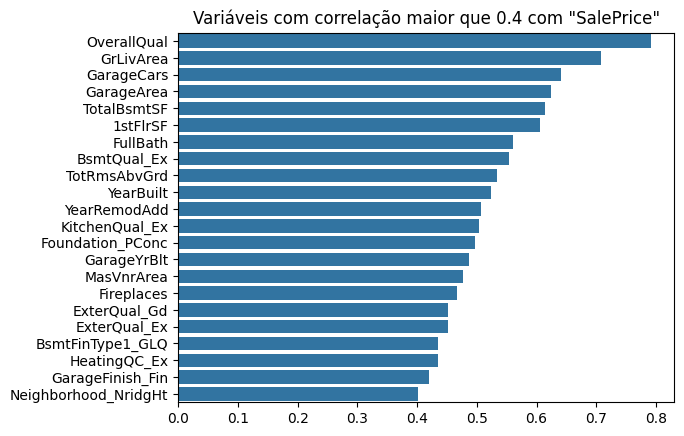

In [369]:
limite = 0.4

data = df_trail_2.corr()["SalePrice"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limite:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Variáveis com correlação maior que 0.4 com "SalePrice"')

In [371]:
unnecessary = []
lab = df_trail_2['SalePrice']
df_train = df_trail_2.drop(columns=[str(item) for item in df_trail_2.columns[1:] if str(item) not in labels])
df_train = df_trail_2.drop(columns=['Id'])

In [373]:
df_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          2003       196.0         706           0  ...           False   
1          1976         0.0         978           0  ...           False   
2          2002       162.0         486           0  ...           False   
3          1970         0.0         216           0  ...           False   
4          2000       350.0         655           0  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0         False         False         True                  False   
1         False         False         True                  False   
2         False         False         True                  False   
3         False         False         True                   True   
4         False         False         True                  False   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 288 columns]

In [374]:
df_train = df_train.fillna(method='bfill')

In [375]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [377]:
X = df_train.drop('SalePrice',axis=1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Example for classification
modelrm = XGBRegressor()
modelrm.fit(X_train, y_train)
y_pred = modelrm.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 26684.04
R-squared (R²): 0.907169820053257


# Trail 3

In [378]:
df_trail_3 = pd.read_csv("C:/Users/LENOVO/Downloads/house-prices-advanced-regression-techniques/train.csv")

In [379]:
df_trail_3.dropna(axis=1, how='any', inplace=True)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [381]:
df_trail_3 = pd.get_dummies(df_trail_3)

In [382]:
X = df_trail_3.drop('SalePrice',axis=1)
y = df_trail_3['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Example for classification
model3 = XGBRegressor()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 25975.51
R-squared (R²): 0.9120341149367734


In [414]:
X = df_trail_3.drop('SalePrice',axis=1)
y = df_trail_3['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Example for classification
model4 = XGBRegressor(learning_rate=0.03, n_estimators=1100, max_depth = 6)
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)

# Assuming y_true are the true target values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 25343.33
R-squared (R²): 0.9162637310090094


# Test

In [571]:
df_test = pd.read_csv("C:/Users/LENOVO/Downloads/house-prices-advanced-regression-techniques/test.csv")
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [572]:
df_test = df_test.drop('LotFrontage', axis = 1) # drop it as it has 259 nulls and if I fill it with 0 it can be outliers
df_test['FireplaceQu'].fillna('No Fireplace', inplace = True)
df_test['MasVnrType'].fillna('No Masonry veneer', inplace = True)
df_test['Fence'].fillna('No Fence', inplace = True)
df_test['Alley'].fillna('No Alley', inplace = True)
df_test['MiscFeature'].fillna('No Other Categories', inplace = True)
df_test['PoolQC'].fillna('No Pool', inplace = True)
#df = df.dropna() #the other will not affect on the data that much

In [573]:
#Log
columns = ['LotArea','TotalBsmtSF','1stFlrSF','GrLivArea', 'GarageArea']
for column in columns:
    df_test[column] = np.log(df_test[column]+1)
    transformed_data, lambda_best_fit = stats.boxcox(df_test[column]+1)
    df_test[column] = transformed_data
    
SelectedFeatures = ['1stFlrSF', 'BedroomAbvGr', 'BsmtHalfBath', 'BsmtUnfSF','ExterQual','Fireplaces','FullBath', 'GarageCars','GrLivArea','LotArea','Neighborhood','OverallQual','TotRmsAbvGrd','TotalBsmtSF','YearBuilt','YearRemodAdd']
dfTest = df_test[SelectedFeatures]

In [574]:
dfTest.head()

1stFlrSF  BedroomAbvGr  BsmtHalfBath  BsmtUnfSF ExterQual  Fireplaces  \
0  4.050796             2           0.0      270.0        TA           0   
1  4.222407             3           0.0      406.0        TA           0   
2  4.066206             3           0.0      137.0        TA           1   
3  4.065260             3           0.0      324.0        TA           1   
4  4.206196             2           0.0     1017.0        Gd           0   

   FullBath  GarageCars  GrLivArea      LotArea Neighborhood  OverallQual  \
0         1         1.0   5.055401  8868.447703        NAmes            5   
1         1         1.0   5.302653  9692.601679        NAmes            6   
2         2         2.0   5.429288  9563.870375      Gilbert            5   
3         2         2.0   5.419690  8291.705182      Gilbert            6   
4         2         2.0   5.279206  6037.339567      StoneBr            8   

   TotRmsAbvGrd   TotalBsmtSF  YearBuilt  YearRemodAdd  
0             5  4.188702e+06       1961          1961  
1             6  6.468302e+06       1958          1958  
2             6  4.425969e+06       1997          1998  
3             7  4.415664e+06       1998          1998  
4             5  6.221477e+06       1992          1992

In [575]:
# Assuming 'df' is your DataFrame
dfTest = pd.get_dummies(dfTest, columns=['ExterQual', 'Neighborhood'], prefix=['ExterQual', 'Neighborhood'])
#dfTest = pd.get_dummies(dfTest, columns=['Neighborhood'], prefix=['Neighborhood'])

In [576]:
y_submission = model.predict(dfTest)
df_submission = pd.DataFrame()
df_submission['Id'] = df_test['Id']
df_submission['SalePrice'] = y_submission
df_submission.head()

Id      SalePrice
0  1461  150237.328125
1  1462  153645.640625
2  1463  188725.640625
3  1464  194926.515625
4  1465  200944.343750

In [577]:
csv_file_path = 'Submission_File.csv'

df_submission.to_csv(csv_file_path, index=False)  # Setting index=False to omit writing row indices